### Data download and station selection

In [1]:
from obspy import UTCDateTime
from obspy.clients.fdsn import Client
from obspy.clients.fdsn import RoutingClient
from obspy import Stream
from obspy.geodetics import gps2dist_azimuth
from obspy import signal

import matplotlib.pyplot as plt
import folium
import numpy as np

In [174]:
#noise measured for a period before Pn. For example Dtmin_Noise=-15 and Dtmax_Noise=-5 means noise is measured 15-5 seconds before Pn
#beware window length: taper for the first 2% of the trace, make sure it doesn't interfere with noise window.
# note that t_Pn starts at approx 40s

Dtmin_Noise=-25
Dtmax_Noise=-5
Dtmin_Pn=-5.
Dtmax_Pn=10.
Dtmin_Sn=-5.
Dtmax_Sn=10.

vLg_max=3.5
vLg_min=3.1
vLg=0.5*(vLg_max+vLg_min)
vPg_max=6.2
vPg_min=5.2
vPg=0.5*(vPg_max+vPg_min)
print(vPg)
#vPg=6.

tminCoda=300.
tmaxCoda=320.

5.7


In [196]:
#event choice
minlat = 37
maxlat = 50.0
minlon = -5
maxlon = 17
minmag = 3.5



event_name='Spain_2_X7west'  #donnees tres bruites
event_name='Friul' 
event_name='Bourg-en-Bresse' # SIGNAL PAS BON
event_name='Prades_2024_06'# AUCUN SIGNAL
event_name='Slovenia'
event_name='Genova' 
event_name='Adriatic' # a regarder
event_name='Spain_1_X7west'
event_name='Pyrenees_2024_05'
event_name='Pyrenees_2012'
event_name='Neuchatel_2024_04'
event_name='Slovenia_2013'
event_name='Vierzon'
event_name='Friul_2013' 
event_name='Spain_3_X7west'
event_name='LaRochelle_X7west'
event_name='Slovenia'
event_name='France_X7center'  
event_name='Rhone Valley' # quite good Lg wave arrivals, however velocity not well defined
event_name='France_Rochemaure' # newly added
event_name='France_west' # newly added
event_name='Massif Central' # a regarder
event_name='Appennines'
event_name='France_west_2' # newly added
event_name='Annecy_2022' # newly added





if event_name == 'Slovenia' :
    start = UTCDateTime("2024-03-27T21:06:00")   #Friul M4.5 event
    end = UTCDateTime("2024-03-27T22:08:00") #Friul M4.5 event


if event_name == 'France_Rochemaure' :
    start = UTCDateTime("2019-11-11 10:50:46 ") #magnitude 4.9
    end = UTCDateTime("2019-11-11 10:55:46 ")
    
if event_name == 'Rhone Valley' :
    start = UTCDateTime("2019-11-11")   #rhone valley event
    end = UTCDateTime("2019-11-12") #rhone valley event

if event_name == 'Friul' :
    start = UTCDateTime("2024-03-27T21:06:00")   #Friul M4.5 event
    end = UTCDateTime("2024-03-27T22:08:00") #Friul M4.5 event

if event_name == 'Massif Central' :
    start = UTCDateTime("2022-05-09T11:11:00")   #massif central
    end = UTCDateTime("2022-05-09T11:16:00") #massif central M4.0


if event_name == 'France_west_2':
    start = UTCDateTime('2019-03-20 09:53:40')  #France_west_2 M5
    end = UTCDateTime('2019-03-20 10:03:40')

if event_name == 'Adriatic' :
    start = UTCDateTime("2022-11-09T06:06:00")   #Adriatic M5.6event
    end = UTCDateTime("2022-11-09T06:08:00") #Adriatic M5.6 event

if event_name == 'Appennines' :
    start = UTCDateTime("2022-02-01T22:06:00")   #Appennines M3.7 event
    end = UTCDateTime("2022-02-01T23:08:00") #Appennines M3.7 event

if event_name == 'Genova'  :
    start = UTCDateTime("2022-02-28") #Genova event
    end = UTCDateTime("2022-03-01")   #Genova event M4.0
    
if event_name == 'Friul_2013'  :
    start = UTCDateTime("2013-02-12") #Friul 2013 event M3.8
    end = UTCDateTime("2013-02-13")   #
    

if event_name == 'France_west'  :
    start = UTCDateTime("2013-11-21 09:50:06") #France_west M3.7
    end = UTCDateTime("2013-11-21 10:00:06")   #

    
if event_name == 'Pyrenees_2012'  :
    start = UTCDateTime("2012-12-30") #Pyrenees 2012 event M4.7
    end = UTCDateTime("2012-12-31")   #

if event_name == 'Annecy_2022'  :
    start = UTCDateTime("2022-03-12 17:00:22 ") #Annecy 2022 event M4.2
    end = UTCDateTime("2022-03-12 17:13:22 ")   #
    
if event_name == 'Slovenia_2013'  :
    start = UTCDateTime("2013-02-02") #Slovenia 2013 event M4.5
    end = UTCDateTime("2013-02-03")   #
    
if event_name == 'Vierzon'  :
    start = UTCDateTime("2013-09-25") #Vierzon
    end = UTCDateTime("2013-09-26")   #
    
if event_name == 'Spain_1_X7west'  :
    start = UTCDateTime("2013-01-09") #Spain_1_X7west M3.7
    end = UTCDateTime("2013-01-10")   #

if event_name == 'Spain_2_X7west'  :
    start = UTCDateTime("2013-02-05") #Spain_2_X7west M3.7
    end = UTCDateTime("2013-02-06")   #

if event_name == 'Spain_3_X7west'  :
    start = UTCDateTime("2013-04-04") #Spain_3_X7west M3.9
    end = UTCDateTime("2013-04-05")   #

if event_name == 'LaRochelle_X7west'  :
    start = UTCDateTime("2013-03-06") #LaRochelle_X7west M3.8
    end = UTCDateTime("2013-03-07")   #
    
if event_name == 'France_X7center'  :
    start = UTCDateTime("2014-01-25") #France_X7center M3.9
    end = UTCDateTime("2014-01-26")   #
    
    
if event_name == 'Bourg-en-Bresse'  :
    start = UTCDateTime("2024-04-01") #Bourg-en-Bresse M3.5
    end = UTCDateTime("2024-04-02")   #
    
    
if event_name == 'Pyrenees_2024_05'  :
    start = UTCDateTime("2024-05-21") #Pyrenees mai 2024 M4.2
    end = UTCDateTime("2024-05-22")   #
    
    
if event_name == 'Prades_2024_06'  :
    start = UTCDateTime("2024-06-25") #Prades M3.8
    end = UTCDateTime("2024-06-26")   # 
    
    
if event_name == 'Neuchatel_2024_04'  :
    start = UTCDateTime("2024-04-22T01:34:00") #Neuchatel
    end = UTCDateTime("2024-04-23T01:37:00")   # 
    

In [197]:

events_list = Client("USGS").get_events(
    minlatitude=minlat,
    maxlatitude=maxlat,
    minlongitude=minlon,
    maxlongitude=maxlon,
    minmagnitude=minmag,
    starttime=start,
    endtime=end
)
print("\nFound %s event(s) from EMSC Data Center:\n" % len(events_list))
print(events_list.__str__(print_all=True))



eqo = events_list[0].origins[0]
eq_start = eqo.time
print(type(eq_start))
t_duration=400. #length of window to request
eq_end = eq_start + t_duration
eq_lat=eqo.latitude
print(type(eq_lat))
eq_lon=eqo.longitude
eq_epi=(eq_lat,eq_lon)


Found 1 event(s) from EMSC Data Center:

1 Event(s) in Catalog:
2022-03-12T17:03:22.558000Z | +45.717,   +6.286 | 4.5  mb | manual
<class 'obspy.core.utcdatetime.UTCDateTime'>
<class 'float'>


In [130]:
degmin=1.9
degmax=10.
start = eq_start
end = eq_end
datacenters=['RESIF','ODC','ETH','INGV','GEOFON','BGR', 'IRIS', 'ICGC']
st_all, stations_all, plot = big_downloader2(datacenters,start,end,eq_lon,eq_lat,degmin,degmax,directory='/home/schreinl/Stage/Data/',plot=True)
plot

Processing stations of ICGC: 100%|██████████| 25/25 [00:01<00:00, 21.73it/s]


In [152]:
fmin=3
fmax=6
f0=0.5*(fmin+fmax)

st_plot_filt_all=st_all.copy()
st_plot_filt_all.filter("bandpass", freqmin=fmin, freqmax=fmax)


838 Trace(s) in Stream:

FR.ABJF.00.HHZ | 2022-03-12T17:03:23.300000Z - 2022-03-12T17:10:03.300000Z | 100.0 Hz, 40001 samples
...
(836 other traces)
...
CA.CCAS..HHZ | 2022-03-12T17:03:23.300000Z - 2022-03-12T17:10:03.300000Z | 100.0 Hz, 40001 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]

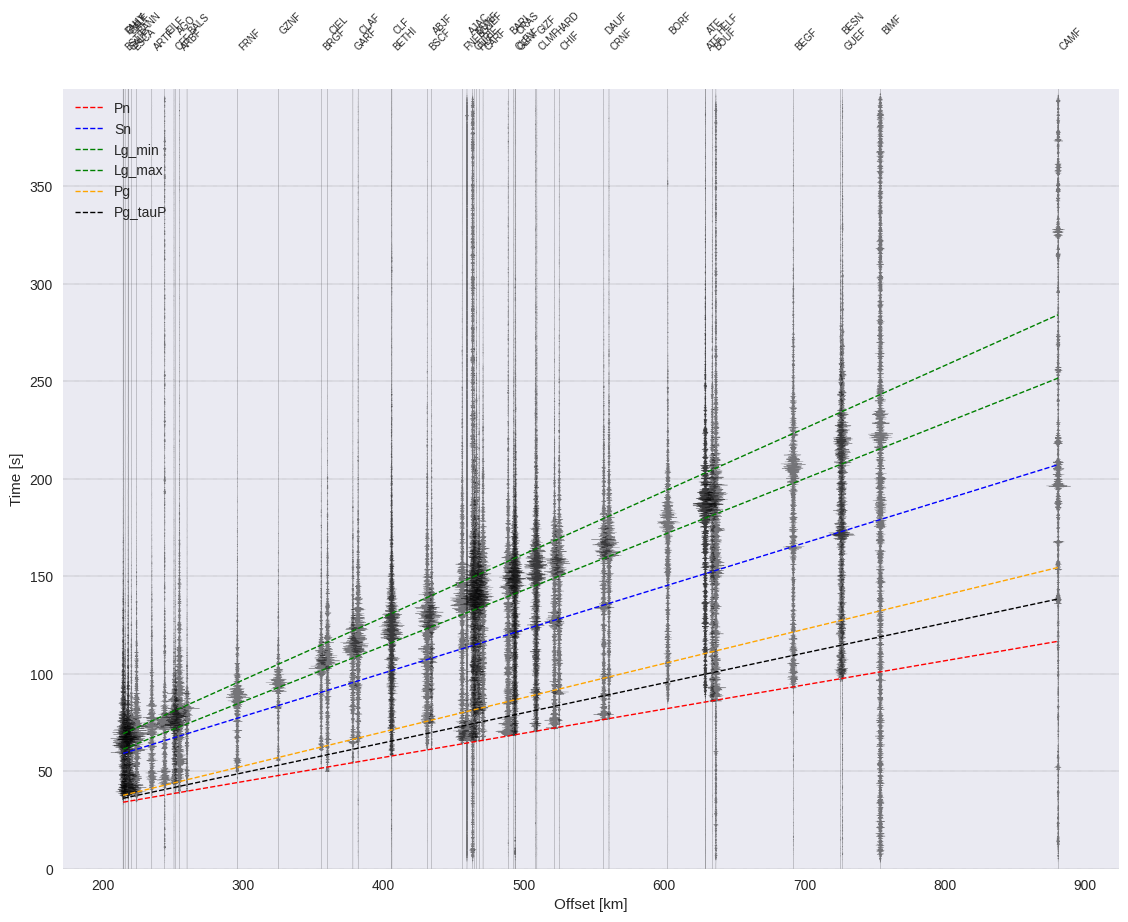

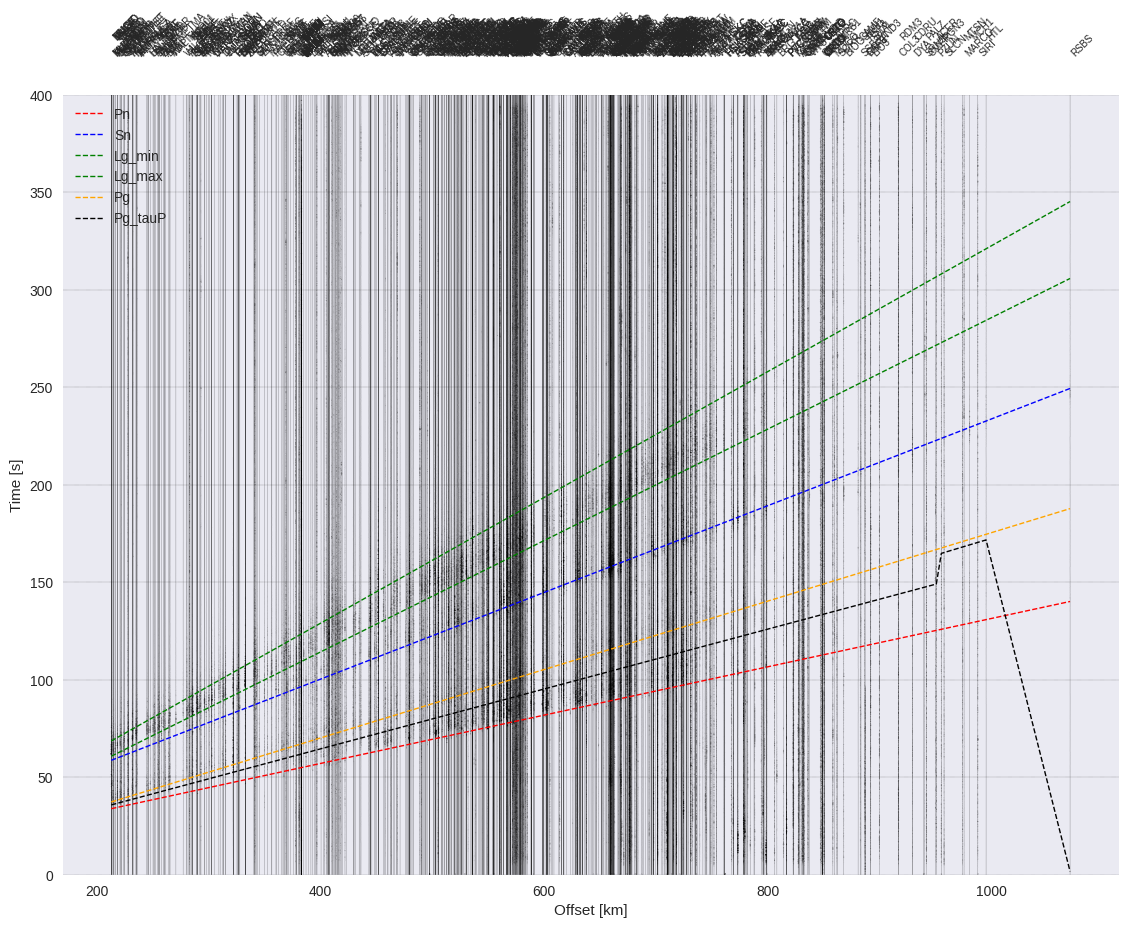

In [153]:

plot, st_Lg0 = plot_record_section(st_plot_filt_all[0:50], stations_all[0:50], eq_lat, eq_lon, eq_start, tracehodo=True, v_Lg_min=vLg_min, v_Lg_max=vLg_max, 
v_Pg=vPg)

plot, st_Lg1 = plot_record_section(st_plot_filt_all, stations_all, eq_lat, eq_lon, eq_start, tracehodo=True, v_Lg_min=vLg_min, v_Lg_max=vLg_max,v_Pg=vPg);

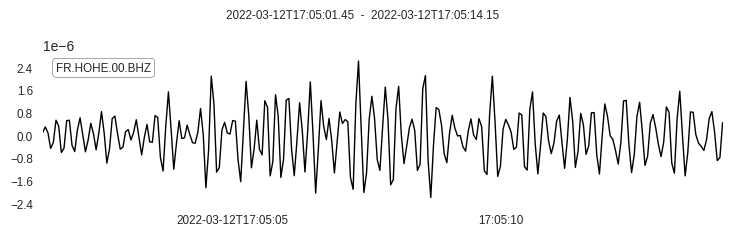

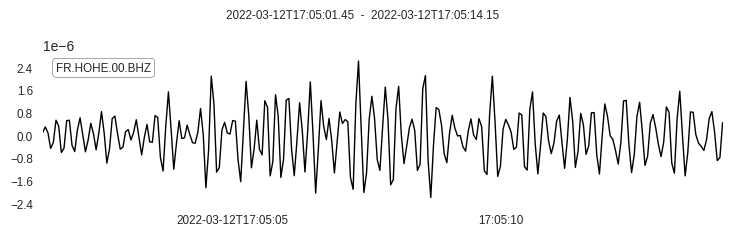

In [154]:
st_Lg1[50].plot()

In [155]:

stations_with_amps=calc_amps(stations_all, 
st_plot_filt_all, Dtmin_Pn, Dtmax_Pn, Dtmin_Sn, Dtmax_Sn, vLg_min,vLg_max,vPg_min, vPg_max, tminCoda, tmaxCoda, Dtmin_Noise, Dtmax_Noise)

print(stations_with_amps.shape)

(733, 16)


In [156]:
#stations_with_amps: 
#net (0), sta (1), lat (2), lon (3), elev (4) , dist(5), az(6), 
# t_Pn (7), t_Sn (8), t_Pg(9), A_Pn (10), A_Sn (11), A_Lg(12), A_Coda(13), A_Noise(14), A_pg(15)

wavecode='Lg_Coda'

distDraw=stations_with_amps[:,5].astype(float)/1000.
azDraw=stations_with_amps[:,6].astype(float) 

if wavecode == 'Pn' :
    Amp_Draw=stations_with_amps[:,10].astype(float)
elif wavecode == 'Sn' :
    Amp_Draw=stations_with_amps[:,11].astype(float)
elif wavecode == 'Lg' :
    Amp_Draw=stations_with_amps[:,12].astype(float)  
elif wavecode == 'Coda' :
    Amp_Draw=stations_with_amps[:,13].astype(float)    
elif wavecode == 'Noise' :
    Amp_Draw=stations_with_amps[:,14].astype(float) 
elif wavecode == 'Pg' :
    Amp_Draw=stations_with_amps[:,15].astype(float)
elif wavecode == 'Lg_Coda' :
    Amp_Draw=np.divide(stations_with_amps[:,12].astype(float),stations_with_amps[:,13].astype(float))
elif wavecode == 'Lg_Pn' :
    Amp_Draw=np.divide(stations_with_amps[:,12].astype(float),stations_with_amps[:,10].astype(float))
elif wavecode == 'Lg_Pg' :
    Amp_Draw=np.divide(stations_with_amps[:,12].astype(float),stations_with_amps[:,15].astype(float))
elif wavecode == 'Lg_Sn' :
    Amp_Draw=np.divide(stations_with_amps[:,12].astype(float),stations_with_amps[:,11].astype(float))
elif wavecode == 'Pn_Coda' :
    Amp_Draw=np.divide(stations_with_amps[:,10].astype(float),stations_with_amps[:,13].astype(float))
elif wavecode == 'Sn_Coda' :
    Amp_Draw=np.divide(stations_with_amps[:,11].astype(float),stations_with_amps[:,13].astype(float))
elif wavecode == 'Lg_Noise' :
    Amp_Draw=np.divide(stations_with_amps[:,12].astype(float),stations_with_amps[:,14].astype(float))
elif wavecode == 'Coda_Noise' :
    Amp_Draw=np.divide(stations_with_amps[:,13].astype(float),stations_with_amps[:,14].astype(float))
else:
    Amp_Draw = np.zeros(stations_with_amps.shape[0])
    print('wavecode not recognized')
Amp_Draw[np.isnan(Amp_Draw)] = 0    
Amp_Draw[np.isinf(Amp_Draw)] = 0

print(Amp_Draw.shape)
print(stations_with_amps.shape)


(733,)
(733, 16)


/tmp/ipykernel_3025/1833750182.py:23: RuntimeWarning: invalid value encountered in divide
  Amp_Draw=np.divide(stations_with_amps[:,12].astype(float),stations_with_amps[:,13].astype(float))


In [157]:
plot_stations_amps(stations_with_amps, 1, 0.7, Amp_Draw, origin=[eq_lat,eq_lon], zoom=5, forcescale=False)

Annecy_2022_Lg_Coda.png


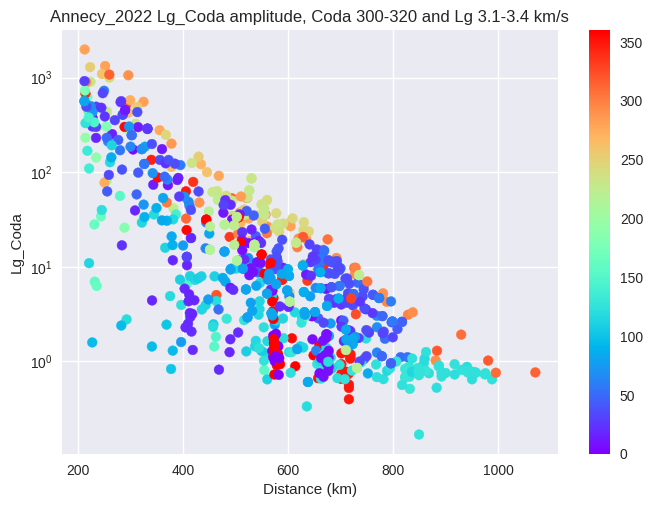

In [158]:
plt.style.use('seaborn-v0_8')
plt.scatter(distDraw, Amp_Draw,c=azDraw,cmap='rainbow',vmin=0, vmax=360.)
plt.colorbar()
plt.xlabel('Distance (km)')
plt.ylabel(wavecode)
plt.title(event_name+ ' ' + wavecode + ' amplitude, Coda 300-320 and Lg 3.1-3.4 km/s' )
#plt.title(event_name+ ' ' + wavecode + ' amplitude, Coda 2.1-2.3 and Lg 3.1-3.56 km/s' )

plt.yscale('log')



outfile=event_name+'_'+wavecode+'.png'

print(outfile)
#plt.savefig(outfile,format='png')

<Figure size 1000x1000 with 0 Axes>

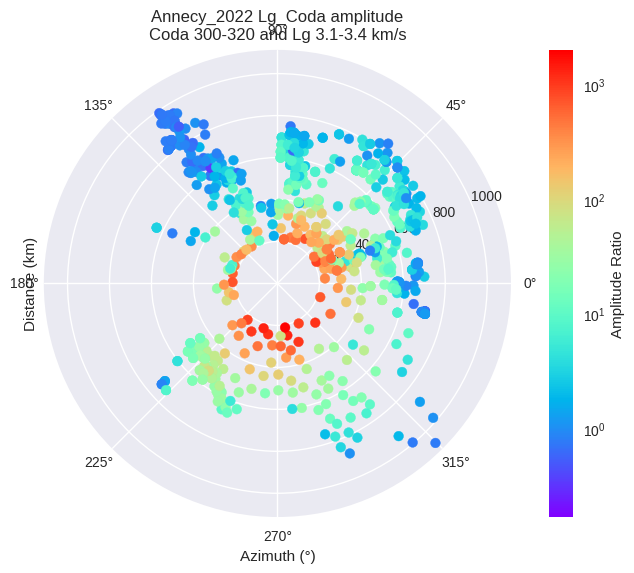

In [153]:

from matplotlib.colors import LogNorm
plt.figure(figsize=(10, 10))
plt.style.use('seaborn-v0_8')


theta = np.radians(azDraw)

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
sc = ax.scatter(theta, distDraw, c=Amp_Draw, cmap='rainbow', norm=LogNorm())
cbar = plt.colorbar(sc, ax=ax)
cbar.set_label('Amplitude Ratio')

fig.tight_layout()

# Labels
ax.set_xlabel('Azimuth (°)')
ax.set_ylabel('Distance (km)')
ax.set_title(f'{event_name} {wavecode} amplitude\nCoda 300-320 and Lg 3.1-3.4 km/s', va='bottom')
plt.savefig(f'{event_name}_{wavecode}_amplitude', format='png')
plt.show()


In [160]:
Q=500

#wavecode can take values of Lg, P, S, Coda, Lg_P, Lg_Coda
#normpower=3.3 memory stuff
 

powerfact=0. # for coda
powerfact=0.5
powerfact=5./6. # for Lg



#plot_stations_amps(stations_with_amps, 1., 0.8, Amp_Draw, origin=[eq_lat,eq_lon], 
#                       zoom=5, geom=True, geompower=powerfact,normQ=True,Q=Q,v=vLg,f0=f0)
plot_stations_amps(stations_with_amps, 1, 0.8, Amp_Draw, origin=[eq_lat,eq_lon], 
                       zoom=5, geom=True, geompower=powerfact,normQ=True,Q=Q,v=vLg,f0=f0, forcescale=False)

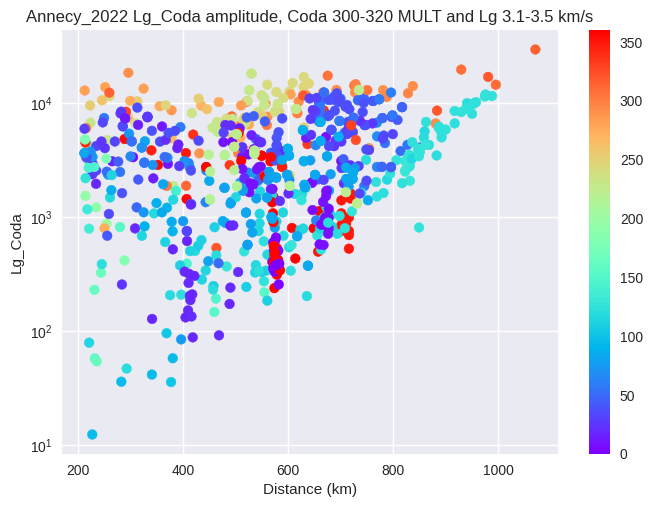

In [161]:
A0=1./np.power(200.,powerfact)                  #setting of the initial amplitude
dist_power=A0*np.power(distDraw,powerfact)      #geometrical spreading
Amp_Draw_power=np.multiply(Amp_Draw,dist_power) #correct amplitude with geometry factor
multexp=np.pi*(f0/vLg/Q)                        #attenuation factor
dist_exp=np.exp(multexp*distDraw)               #apply attenuation factor to distance

Amp_Draw_exp=np.multiply(Amp_Draw_power,dist_exp)   #this is the full amplitude, which includes geometrical spreading and attenuation
amp_median=np.median(Amp_Draw_exp)
ymin=0.1*amp_median
ymax=10.*amp_median

plt.scatter(distDraw, Amp_Draw_exp,c=azDraw,cmap='rainbow',vmin=0, vmax=360.)
plt.colorbar()
plt.xlabel('Distance (km)')
plt.ylabel(wavecode)
plt.title(event_name+ ' ' + wavecode + ' amplitude, Coda 300-320 MULT and Lg 3.1-3.5 km/s' )
#plt.ylim([ymin, ymax])

plt.yscale('log')


<Figure size 1000x1000 with 0 Axes>

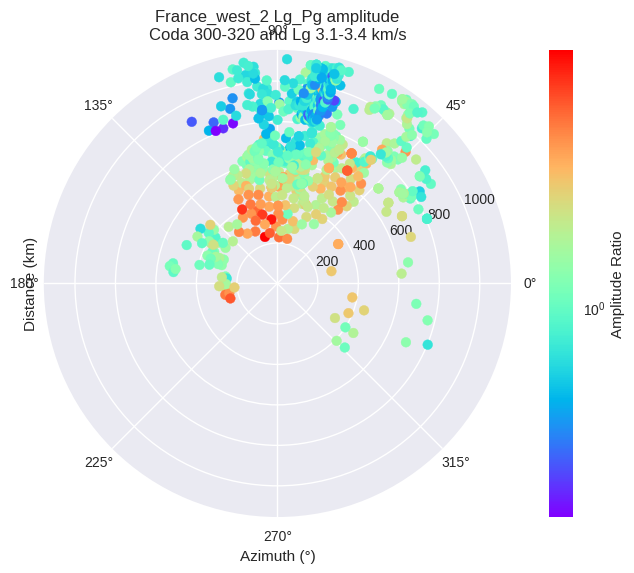

In [110]:
plt.figure(figsize=(10, 10))
plt.style.use('seaborn-v0_8')

theta = np.radians(azDraw)

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
sc = ax.scatter(theta, distDraw,c=Amp_Draw, cmap='rainbow', norm=LogNorm())
cbar = plt.colorbar(sc, ax=ax)
cbar.set_label('Amplitude Ratio')

fig.tight_layout()

# Labels
ax.set_xlabel('Azimuth (°)')
ax.set_ylabel('Distance (km)')
ax.set_title(f'{event_name} {wavecode} amplitude\nCoda 300-320 and Lg 3.1-3.4 km/s', va='bottom')
plt.savefig(f'{event_name}_{wavecode}_amplitude_Q_corrected', format='png')
plt.show()

#### Calculate spectral ratios of Phases
This is the same process as before, but this time the spectral ratios are taken. So a frequency window is introduced, and the amplitude of this frequency window is calculated in the Fourier space.

In [209]:
fmin = 3
fmax = 6
stations_with_spectral_amps=spectral_ratios(stations_all, 
st_plot_filt_all, Dtmin_Pn, Dtmax_Pn, Dtmin_Sn, Dtmax_Sn, vLg_min,vLg_max,vPg_min,vPg_max, tminCoda, tmaxCoda, Dtmin_Noise, Dtmax_Noise, fmin, fmax)


In [210]:
#stations_with_amps: 
#net (0), sta (1), lat (2), lon (3), elev (4) , dist(5), az(6), 
# t_Pn (7), t_Sn (8), t_Pg(9), A_Pn (10), A_Sn (11), A_Lg(12), A_Coda(13), A_Noise(14), A_pg(15)

wavecode='Lg_Pg'

distDraw=stations_with_amps[:,5].astype(float)/1000.
azDraw=stations_with_amps[:,6].astype(float) 

if wavecode == 'Pn' :
    Amp_Draw=stations_with_amps[:,10].astype(float)
elif wavecode == 'Sn' :
    Amp_Draw=stations_with_amps[:,11].astype(float)
elif wavecode == 'Lg' :
    Amp_Draw=stations_with_amps[:,12].astype(float)  
elif wavecode == 'Coda' :
    Amp_Draw=stations_with_amps[:,13].astype(float)    
elif wavecode == 'Noise' :
    Amp_Draw=stations_with_amps[:,14].astype(float) 
elif wavecode == 'Pg' :
    Amp_Draw=stations_with_amps[:,15].astype(float)
elif wavecode == 'Lg_Coda' :
    Amp_Draw=np.divide(stations_with_amps[:,12].astype(float),stations_with_amps[:,13].astype(float))
elif wavecode == 'Lg_Pn' :
    Amp_Draw=np.divide(stations_with_amps[:,12].astype(float),stations_with_amps[:,10].astype(float))
elif wavecode == 'Lg_Pg' :
    Amp_Draw=np.divide(stations_with_amps[:,12].astype(float),stations_with_amps[:,15].astype(float))
elif wavecode == 'Lg_Sn' :
    Amp_Draw=np.divide(stations_with_amps[:,12].astype(float),stations_with_amps[:,11].astype(float))
elif wavecode == 'Pn_Coda' :
    Amp_Draw=np.divide(stations_with_amps[:,10].astype(float),stations_with_amps[:,13].astype(float))
elif wavecode == 'Sn_Coda' :
    Amp_Draw=np.divide(stations_with_amps[:,11].astype(float),stations_with_amps[:,13].astype(float))
elif wavecode == 'Lg_Noise' :
    Amp_Draw=np.divide(stations_with_amps[:,12].astype(float),stations_with_amps[:,14].astype(float))
elif wavecode == 'Coda_Noise' :
    Amp_Draw=np.divide(stations_with_amps[:,13].astype(float),stations_with_amps[:,14].astype(float))
else:
    Amp_Draw = np.zeros(stations_with_amps.shape[0])
    print('wavecode not recognized')
Amp_Draw[np.isnan(Amp_Draw)] = 0    
Amp_Draw[np.isinf(Amp_Draw)] = 0

print(Amp_Draw.shape)
print(stations_with_amps.shape)

(747,)
(747, 16)


/tmp/ipykernel_4041/2974967432.py:27: RuntimeWarning: divide by zero encountered in divide
  Amp_Draw=np.divide(stations_with_amps[:,12].astype(float),stations_with_amps[:,15].astype(float))
/tmp/ipykernel_4041/2974967432.py:27: RuntimeWarning: invalid value encountered in divide
  Amp_Draw=np.divide(stations_with_amps[:,12].astype(float),stations_with_amps[:,15].astype(float))


In [211]:
plot_stations_amps(stations_with_amps, 1, 0.7, Amp_Draw, origin=[eq_lat,eq_lon], zoom=5, forcescale=False)

### Signal-to-Noise-ratio

In order to define the SNR correcly, a signal window is chosen. Different phases can be chosen, and the coda. As well as that different techniques to compute the SNR can be chosen (for now time amplitude).

In [111]:
SNR_method = 'time_amplitude'

stations_with_SNR = SNR(stations_all, 
    st_plot_filt_all, Dtmin_Pn, Dtmax_Pn, Dtmin_Sn, Dtmax_Sn, vLg_min,vLg_max,vPg_min, vPg_max, tminCoda, tmaxCoda,
            Dtmin_Noise, Dtmax_Noise, method=SNR_method,signal_window='Lg')
Amp_Draw=stations_with_SNR[:,10].astype(float)
Amp_Draw[np.isnan(Amp_Draw)] = 0    
Amp_Draw[np.isinf(Amp_Draw)] = 0
SNR_plot = plot_stations_amps(stations_with_SNR, 1, 0.7, Amp_Draw, origin=[eq_lat,eq_lon], zoom=5, forcescale=False)
SNR_plot

calculating SNR for Lg  phase


/tmp/ipykernel_2988/1731623467.py:61: RuntimeWarning: invalid value encountered in scalar divide
  snr = 10 * np.log10(signal_power / noise_power)
/tmp/ipykernel_2988/1731623467.py:61: RuntimeWarning: divide by zero encountered in log10
  snr = 10 * np.log10(signal_power / noise_power)
/tmp/ipykernel_2988/1731623467.py:61: RuntimeWarning: divide by zero encountered in scalar divide
  snr = 10 * np.log10(signal_power / noise_power)


calculating SNR for coda  phase
calculating SNR for Pn  phase


/tmp/ipykernel_2988/1731623467.py:48: RuntimeWarning: invalid value encountered in scalar divide
  snr = 10 * np.log10(signal_power / noise_power)
/tmp/ipykernel_2988/1731623467.py:48: RuntimeWarning: divide by zero encountered in log10
  snr = 10 * np.log10(signal_power / noise_power)
/tmp/ipykernel_2988/1731623467.py:48: RuntimeWarning: divide by zero encountered in scalar divide
  snr = 10 * np.log10(signal_power / noise_power)
/tmp/ipykernel_2988/1731623467.py:74: RuntimeWarning: invalid value encountered in scalar divide
  snr = 10 * np.log10(signal_power / noise_power)
/tmp/ipykernel_2988/1731623467.py:74: RuntimeWarning: divide by zero encountered in log10
  snr = 10 * np.log10(signal_power / noise_power)
/tmp/ipykernel_2988/1731623467.py:74: RuntimeWarning: divide by zero encountered in scalar divide
  snr = 10 * np.log10(signal_power / noise_power)


calculating SNR for Sn  phase
calculating SNR for Lg  phase


/tmp/ipykernel_2988/1731623467.py:87: RuntimeWarning: invalid value encountered in scalar divide
  snr = 10 * np.log10(signal_power / noise_power)
/tmp/ipykernel_2988/1731623467.py:87: RuntimeWarning: divide by zero encountered in log10
  snr = 10 * np.log10(signal_power / noise_power)
/tmp/ipykernel_2988/1731623467.py:87: RuntimeWarning: divide by zero encountered in scalar divide
  snr = 10 * np.log10(signal_power / noise_power)
/tmp/ipykernel_2988/1731623467.py:61: RuntimeWarning: invalid value encountered in scalar divide
  snr = 10 * np.log10(signal_power / noise_power)
/tmp/ipykernel_2988/1731623467.py:61: RuntimeWarning: divide by zero encountered in log10
  snr = 10 * np.log10(signal_power / noise_power)
/tmp/ipykernel_2988/1731623467.py:61: RuntimeWarning: divide by zero encountered in scalar divide
  snr = 10 * np.log10(signal_power / noise_power)


calculating SNR for Pg  phase


/tmp/ipykernel_2988/1731623467.py:100: RuntimeWarning: invalid value encountered in scalar divide
  snr = 10 * np.log10(signal_power / noise_power)
/tmp/ipykernel_2988/1731623467.py:100: RuntimeWarning: divide by zero encountered in log10
  snr = 10 * np.log10(signal_power / noise_power)
/tmp/ipykernel_2988/1731623467.py:100: RuntimeWarning: divide by zero encountered in scalar divide
  snr = 10 * np.log10(signal_power / noise_power)


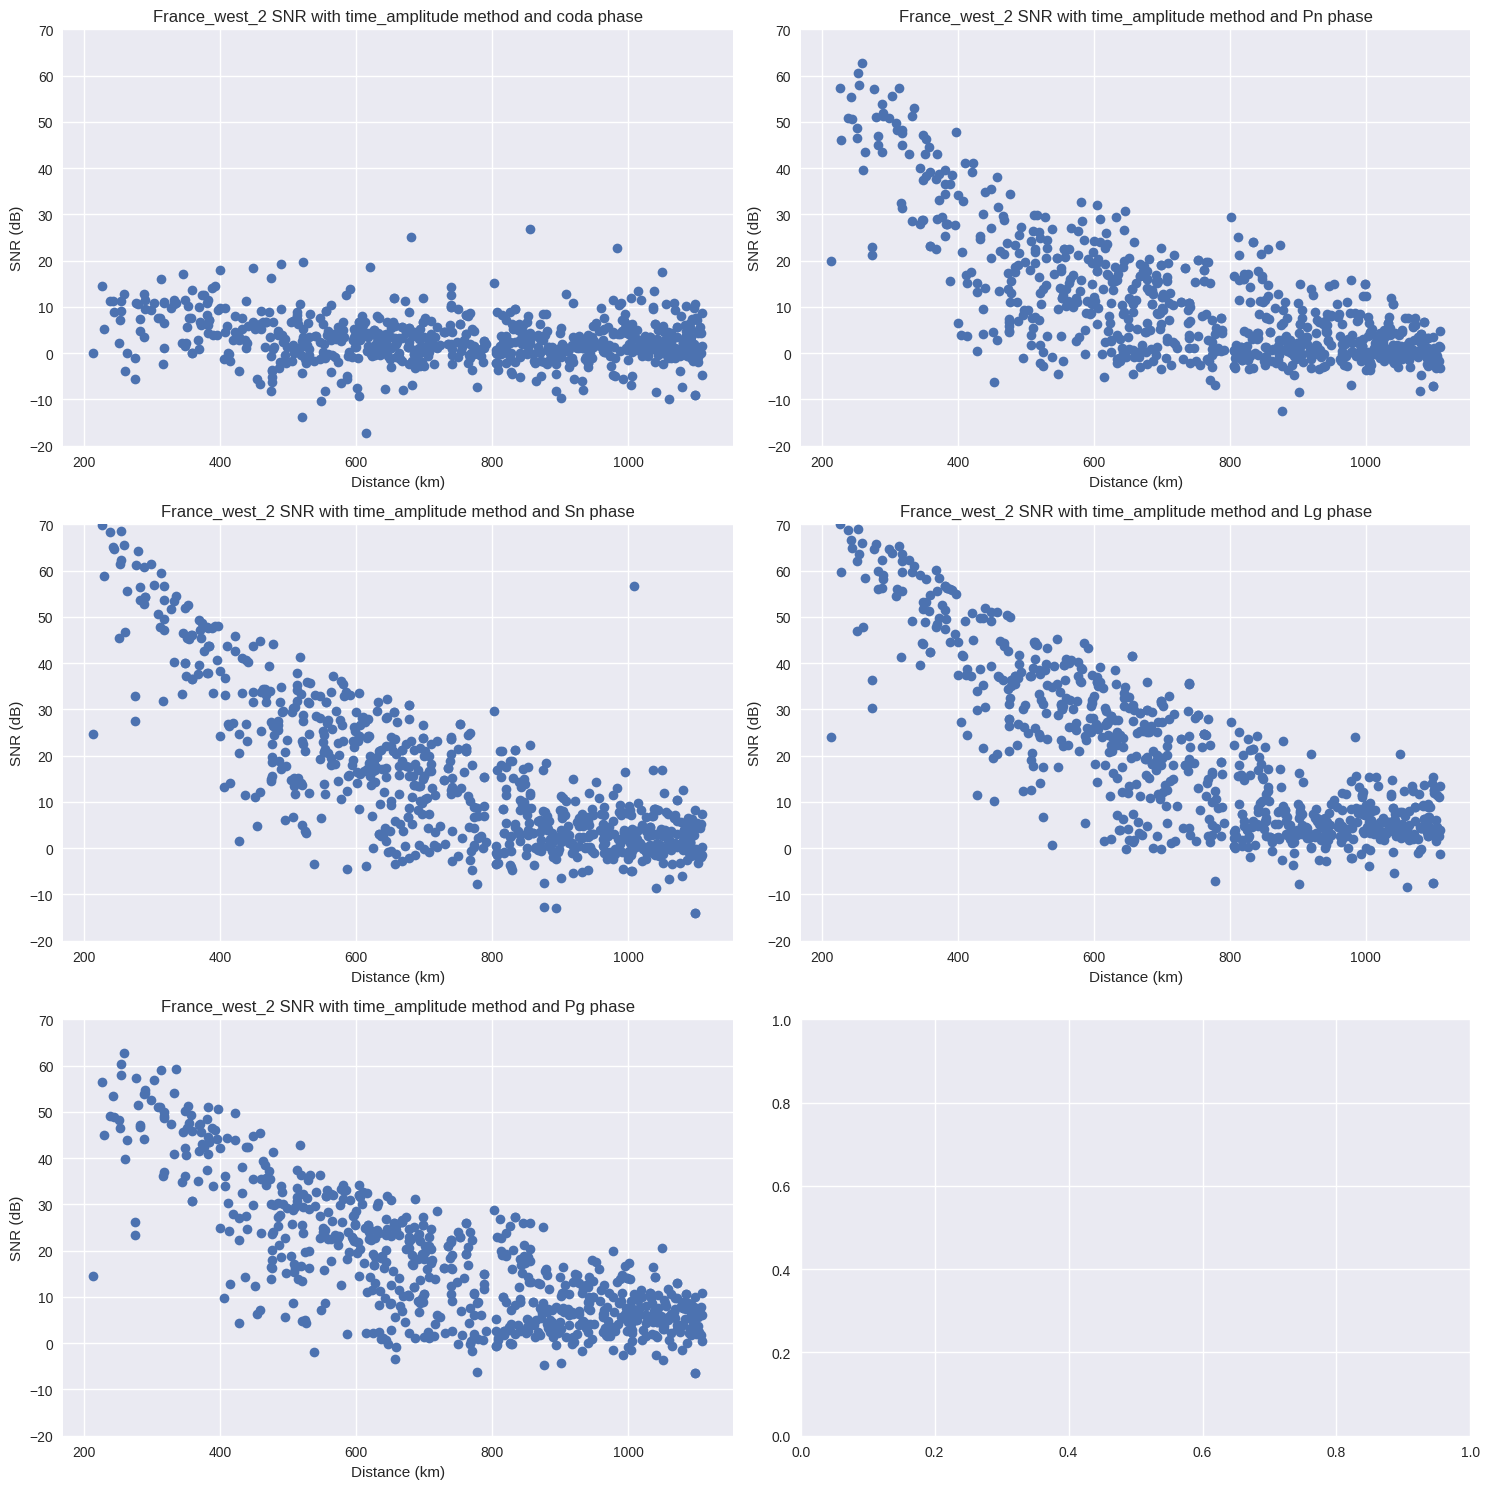

In [112]:
phases = ['coda','Pn', 'Sn', 'Lg', 'Pg']

#for phase in phases:
#    stations_with_SNR = SNR(stations_all, 
#    st_plot_filt_all, Dtmin_Pn, Dtmax_Pn, Dtmin_Sn, Dtmax_Sn, vLg_min,vLg_max,vPg_min, vPg_max, tminCoda, tmaxCoda,
#            Dtmin_Noise, Dtmax_Noise, method=SNR_method,signal_window=phase)
#    SNR_vals = stations_with_SNR[:,10].astype(float)
#    dist_vals = stations_with_SNR[:,5].astype(float)/1000.

fig, axs = plt.subplots(3, 2, figsize=(15, 15))
plt.style.use('seaborn-v0_8')

for i, phase in enumerate(phases):
    stations_with_SNR = SNR(stations_all, 
                            st_plot_filt_all, Dtmin_Pn, Dtmax_Pn, Dtmin_Sn, Dtmax_Sn, 
                            vLg_min, vLg_max, vPg_min, vPg_max, tminCoda, tmaxCoda, Dtmin_Noise, Dtmax_Noise, 
                            method=SNR_method, signal_window=phase)
    SNR_vals = stations_with_SNR[:,10].astype(float)
    dist_vals = stations_with_SNR[:,5].astype(float)/1000.
    
    ax = axs[i//2, i%2]
    ax.plot(dist_vals, SNR_vals, 'o')
    ax.set_ylim([-20, 70])
    ax.set_xlabel('Distance (km)')
    ax.set_ylabel('SNR (dB)')
    ax.set_title(f'{event_name} SNR with {SNR_method} method and {phase} phase')
#plt.savefig(f'/home/schreinl/Stage/Figures/SNR/{event_name}_SNR_phases_long.png', format='png')
plt.tight_layout()
plt.show()



The SNR calculated with seismic phases show strong dependency of the distance, this can be due to geometrical spreading, attenuation (Q factor) which can be azimuth dependent, site effects or radiation pattern. The only SNR which does not show a distance dependancy is the SNR calculated with the signal enery of the coda.

We can try to correct for the geometrical spreading using the formulation of Campillo et al. (1984), of the form $A = A_0 r^{-0.83}$.


Using this SNR of the coda, we could now select stations with an adequate SNR in terms of overall signal. Later on the same thing for the Lg wave could be done.

Now finding the distance, for which for a given phase 90% of the stations have a SNR above 1.5.

calculating SNR for coda  phase


/tmp/ipykernel_2988/1731623467.py:48: RuntimeWarning: invalid value encountered in scalar divide
  snr = 10 * np.log10(signal_power / noise_power)
/tmp/ipykernel_2988/1731623467.py:48: RuntimeWarning: divide by zero encountered in log10
  snr = 10 * np.log10(signal_power / noise_power)
/tmp/ipykernel_2988/1731623467.py:48: RuntimeWarning: divide by zero encountered in scalar divide
  snr = 10 * np.log10(signal_power / noise_power)
/tmp/ipykernel_2988/1265894710.py:46: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  ax.plot(dist_vals[dist_vals > percentile_distance], poly1d_fn1(dist_vals[dist_vals > percentile_distance]), 'r', color='r', label='insufficient SNR')
/tmp/ipykernel_2988/1265894710.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precede

Distance where 90% of SNR values are above 1.5: 1049.5820831278554
calculating SNR for Pn  phase
Distance where 90% of SNR values are above 1.5: 1013.775822777452


/tmp/ipykernel_2988/1731623467.py:74: RuntimeWarning: invalid value encountered in scalar divide
  snr = 10 * np.log10(signal_power / noise_power)
/tmp/ipykernel_2988/1731623467.py:74: RuntimeWarning: divide by zero encountered in log10
  snr = 10 * np.log10(signal_power / noise_power)
/tmp/ipykernel_2988/1731623467.py:74: RuntimeWarning: divide by zero encountered in scalar divide
  snr = 10 * np.log10(signal_power / noise_power)


calculating SNR for Sn  phase


/tmp/ipykernel_2988/1731623467.py:87: RuntimeWarning: invalid value encountered in scalar divide
  snr = 10 * np.log10(signal_power / noise_power)
/tmp/ipykernel_2988/1731623467.py:87: RuntimeWarning: divide by zero encountered in log10
  snr = 10 * np.log10(signal_power / noise_power)
/tmp/ipykernel_2988/1731623467.py:87: RuntimeWarning: divide by zero encountered in scalar divide
  snr = 10 * np.log10(signal_power / noise_power)
/tmp/ipykernel_2988/1731623467.py:61: RuntimeWarning: invalid value encountered in scalar divide
  snr = 10 * np.log10(signal_power / noise_power)
/tmp/ipykernel_2988/1731623467.py:61: RuntimeWarning: divide by zero encountered in log10
  snr = 10 * np.log10(signal_power / noise_power)
/tmp/ipykernel_2988/1731623467.py:61: RuntimeWarning: divide by zero encountered in scalar divide
  snr = 10 * np.log10(signal_power / noise_power)


Distance where 90% of SNR values are above 1.5: 1034.3991897476312
calculating SNR for Lg  phase
Distance where 90% of SNR values are above 1.5: 1052.0315339711997
calculating SNR for Pg  phase


/tmp/ipykernel_2988/1731623467.py:100: RuntimeWarning: invalid value encountered in scalar divide
  snr = 10 * np.log10(signal_power / noise_power)
/tmp/ipykernel_2988/1731623467.py:100: RuntimeWarning: divide by zero encountered in log10
  snr = 10 * np.log10(signal_power / noise_power)
/tmp/ipykernel_2988/1731623467.py:100: RuntimeWarning: divide by zero encountered in scalar divide
  snr = 10 * np.log10(signal_power / noise_power)


Distance where 90% of SNR values are above 1.5: 1050.824651042975


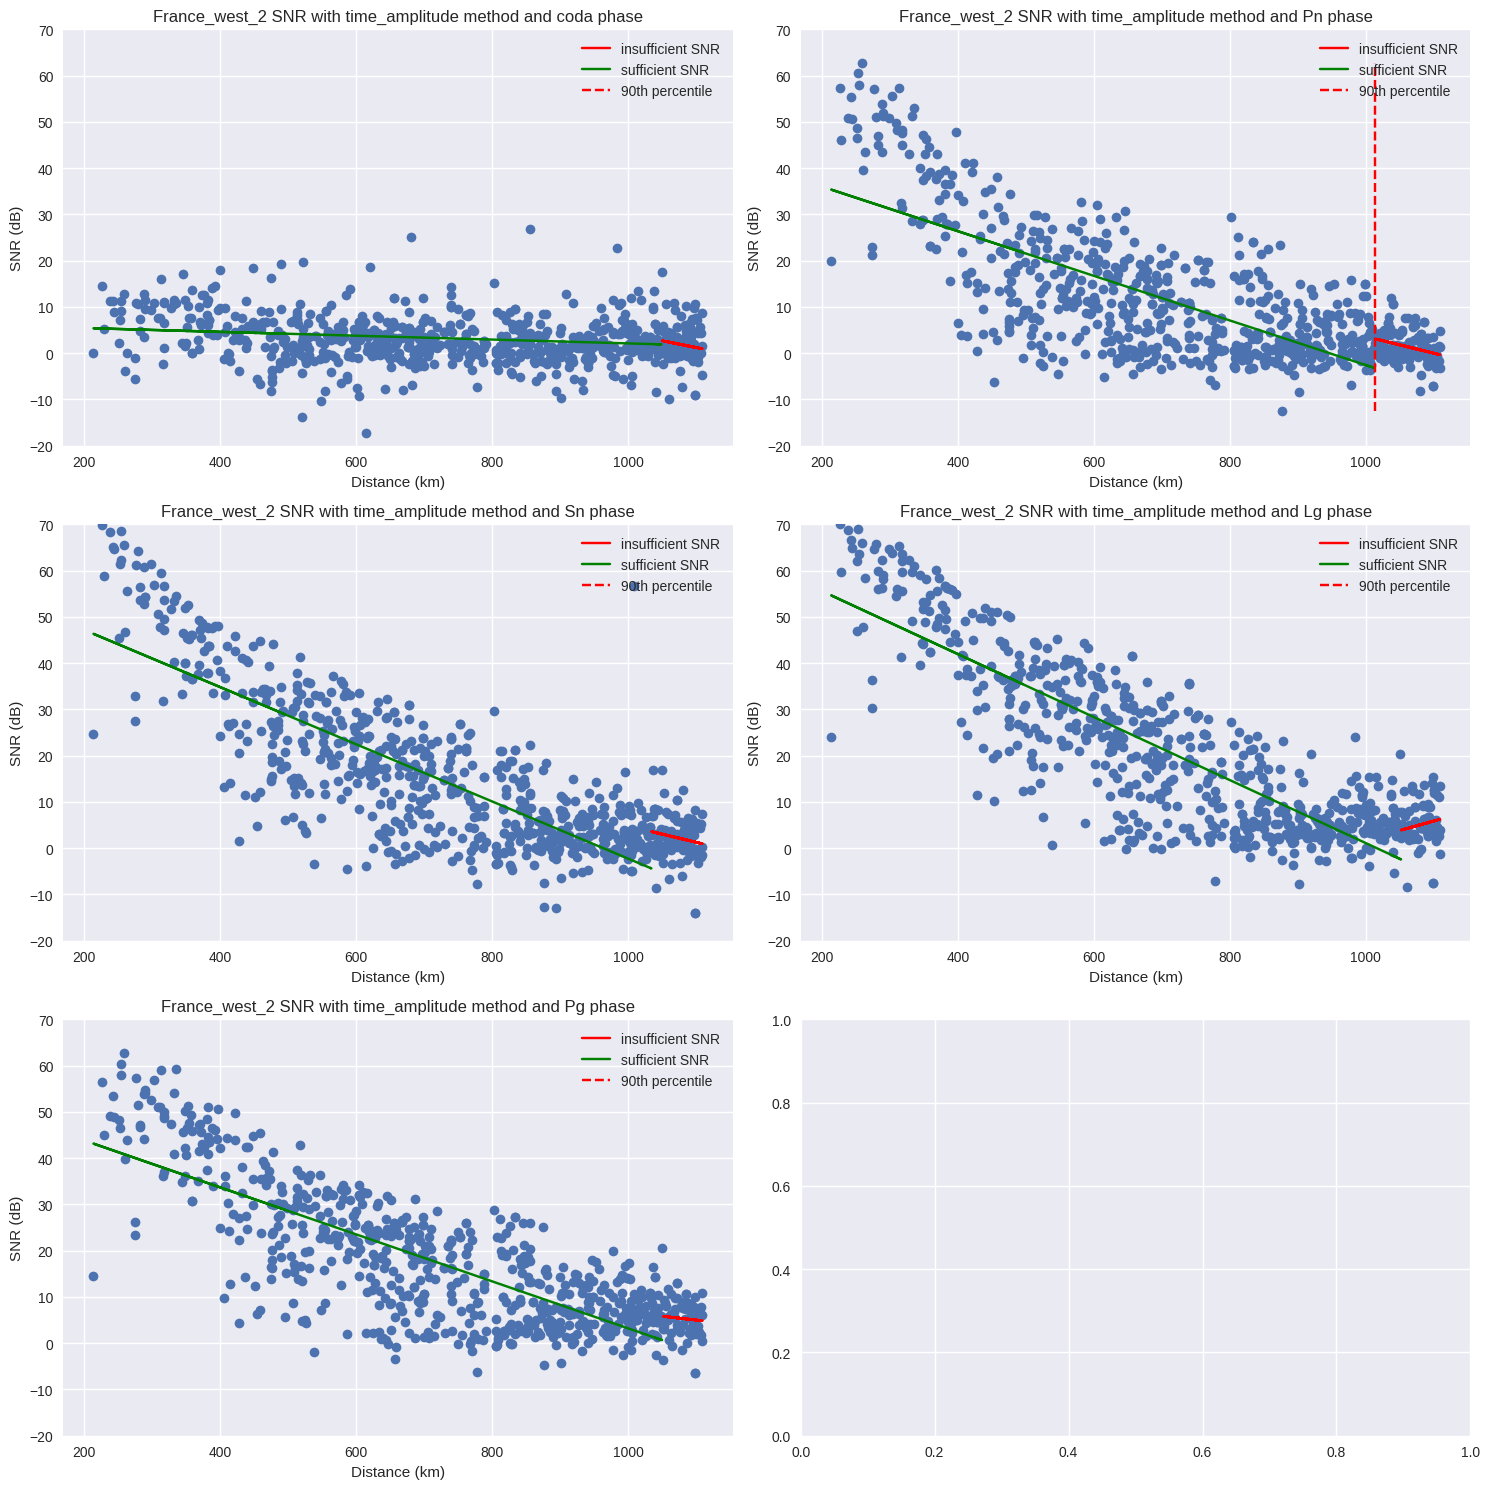

In [113]:

SNR_distance_threshold = SNR_distance(stations_all, st_plot_filt_all, Dtmin_Pn, Dtmax_Pn, Dtmin_Sn, Dtmax_Sn, vLg_min,vLg_max,vPg_min, vPg_max, tminCoda, tmaxCoda,
                 Dtmin_Noise, Dtmax_Noise, fmin=3, fmax=6)

In [50]:
print(SNR_distance_threshold['Lg']['percentile_distance'])
print(SNR_distance_threshold)

879.1446550411829
{'coda': {'percentile_distance': 893.8769139337243, 'coef_quad': -0.005786278712617672, 'coef1': 0.007273372850918041}, 'Pn': {'percentile_distance': 865.7418678043497, 'coef_quad': -0.05053485762536013, 'coef1': 0.013994010910003404}, 'Sn': {'percentile_distance': 837.9855243863925, 'coef_quad': -0.06690881000446174, 'coef1': 0.00104655148351048}, 'Lg': {'percentile_distance': 879.1446550411829, 'coef_quad': -0.07532022382826188, 'coef1': 8.281219325557638e-05}, 'Pg': {'percentile_distance': 885.4556325972986, 'coef_quad': -0.05726748691122199, 'coef1': -0.009601688501408183}}


Importantly, we can also seek to find the differences in SNR, when doing the SNR for the coda over noise, for different time windows of the coda. We will look at different onsets of the window, with same lengths. 

calculating SNR for coda  phase
mean of SNR with time window 220.0-240.0: 9.356659517900379
calculating SNR for coda  phase


/tmp/ipykernel_2988/1731623467.py:48: RuntimeWarning: invalid value encountered in scalar divide
  snr = 10 * np.log10(signal_power / noise_power)
/tmp/ipykernel_2988/1731623467.py:48: RuntimeWarning: divide by zero encountered in log10
  snr = 10 * np.log10(signal_power / noise_power)
/tmp/ipykernel_2988/1731623467.py:48: RuntimeWarning: divide by zero encountered in scalar divide
  snr = 10 * np.log10(signal_power / noise_power)


mean of SNR with time window 240.0-260.0: 7.860742365567635
calculating SNR for coda  phase
mean of SNR with time window 270.0-290.0: 4.875915502799846
calculating SNR for coda  phase
mean of SNR with time window 280.0-300.0: 4.239214850718448
calculating SNR for coda  phase
mean of SNR with time window 290.0-310.0: 3.7212425624759415
calculating SNR for coda  phase
mean of SNR with time window 300.0-320.0: 3.1582866998075
calculating SNR for coda  phase
mean of SNR with time window 310.0-330.0: 2.580782854543169
calculating SNR for coda  phase
mean of SNR with time window 320.0-340.0: 2.2142218282096824


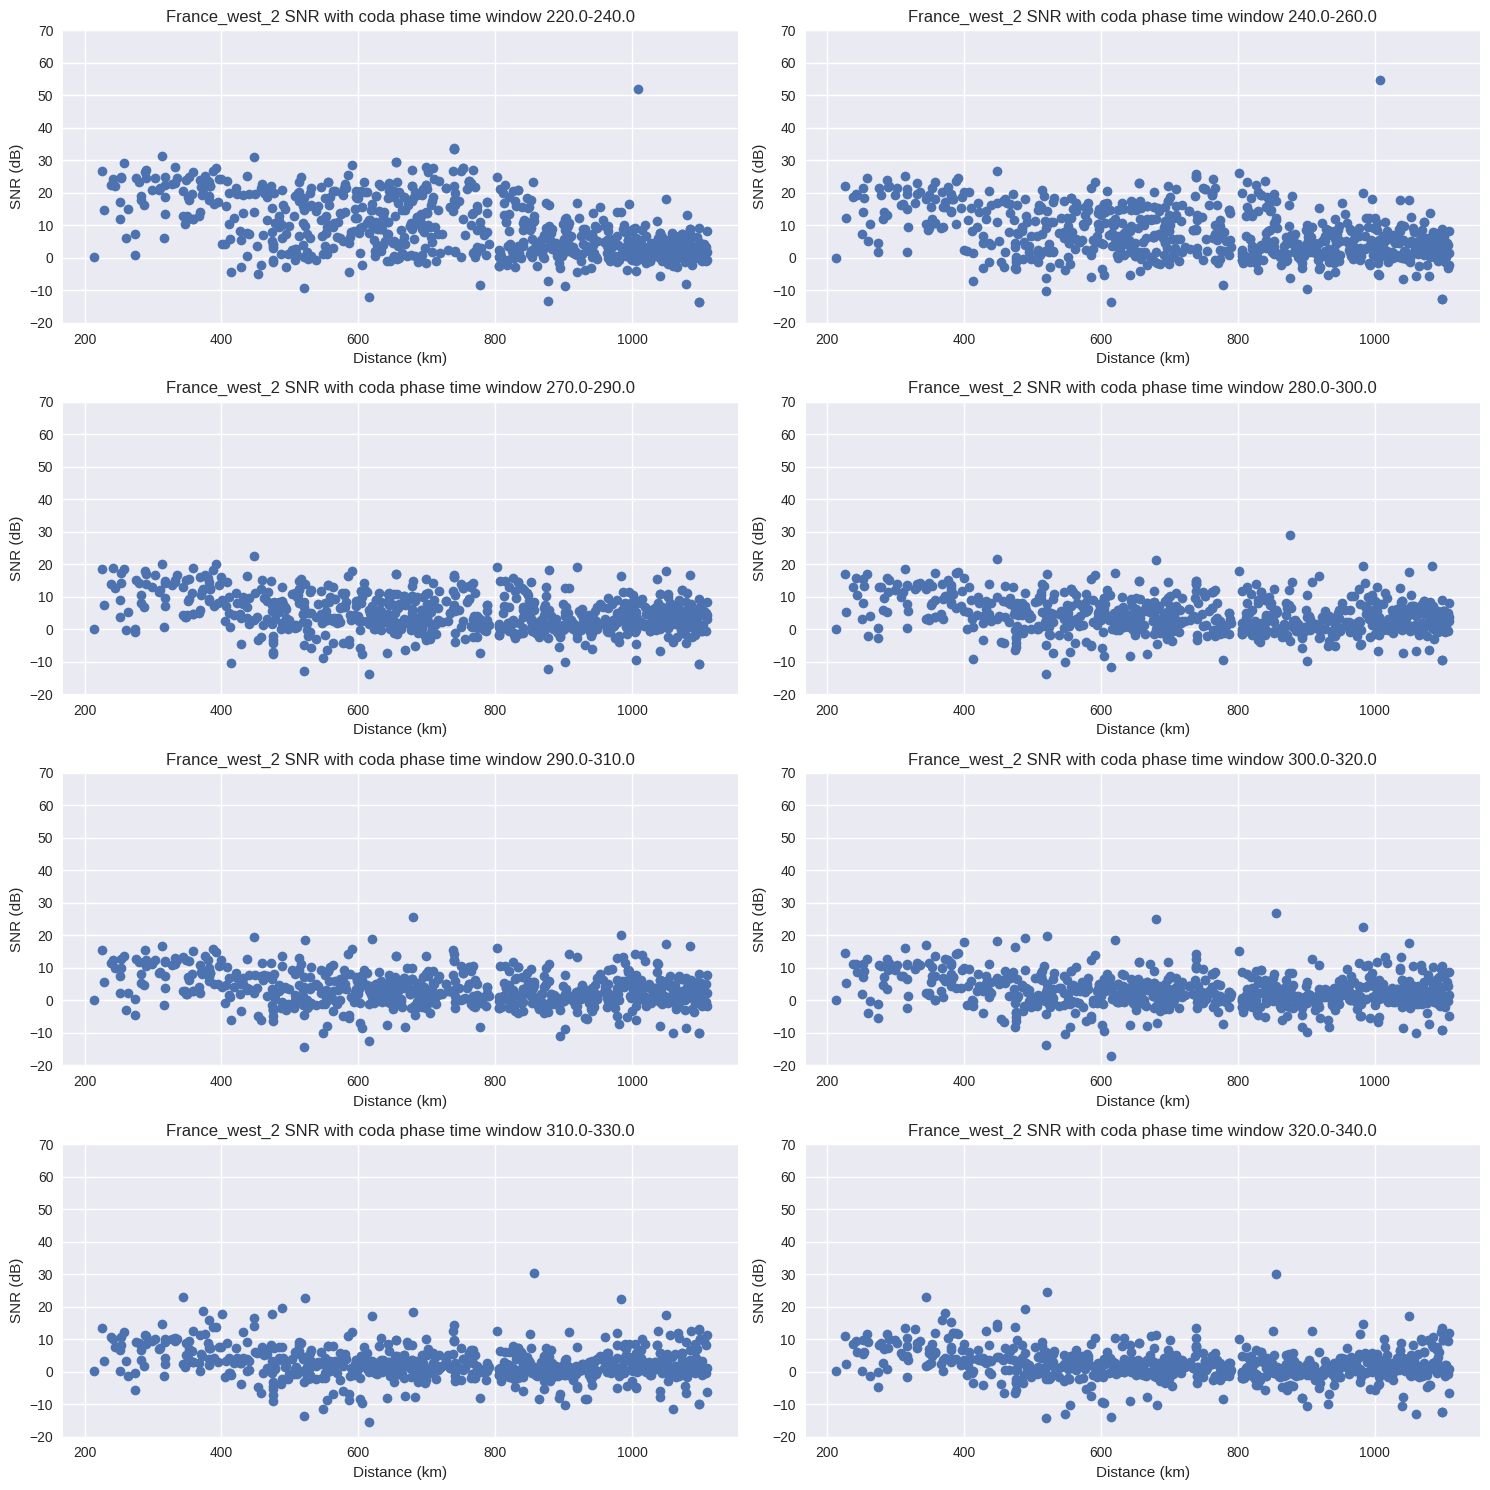

In [114]:
tminCoda=[220.,240.,270.,280.,290.,300.,310.,320.]
tmaxCoda=[240.,260.,290.,300.,310.,320.,330.,340.]
mean_SNR = []

fig, axs = plt.subplots(4, 2, figsize=(15, 15))
plt.style.use('seaborn-v0_8')

for i in range(len(tminCoda)):
    stations_with_SNR = SNR(stations_all, 
                            st_plot_filt_all, Dtmin_Pn, Dtmax_Pn, Dtmin_Sn, Dtmax_Sn, 
                            vLg_min, vLg_max, vPg_min, vPg_max, tminCoda[i], tmaxCoda[i], Dtmin_Noise, Dtmax_Noise,
                            signal_window='coda')
    SNR_vals = stations_with_SNR[:,10].astype(float)
    print(f"mean of SNR with time window {tminCoda[i]}-{tmaxCoda[i]}: {np.mean(np.nan_to_num(SNR_vals, nan=0.0, posinf=0.0, neginf=0.0))}")
    dist_vals = stations_with_SNR[:,5].astype(float)/1000.
    mean_SNR.append(np.mean(np.nan_to_num(SNR_vals, nan=0.0, posinf=0.0, neginf=0.0)))
    ax = axs[i//2, i%2]
    ax.plot(dist_vals, SNR_vals, 'o')
    ax.set_xlabel('Distance (km)')
    ax.set_ylim([-20, 70])
    ax.set_ylabel('SNR (dB)')
    ax.set_title(f'{event_name} SNR with coda phase time window {tminCoda[i]}-{tmaxCoda[i]}')
#plt.savefig(f'/home/schreinl/Stage/Figures/{event_name}_SNR_coda_windows.png', format='png')
plt.tight_layout()
plt.show()





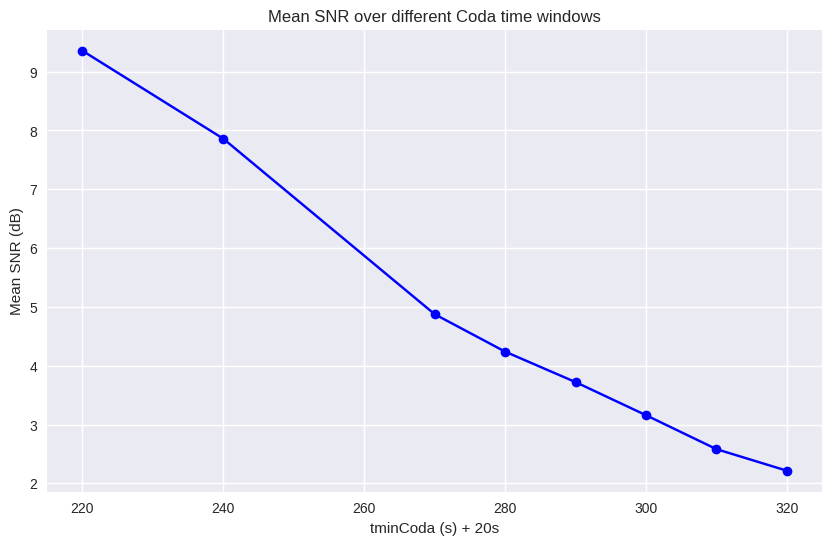

In [115]:
plt.figure(figsize=(10, 6))
plt.plot(tminCoda, mean_SNR, marker='o', linestyle='-', color='b')
plt.xlabel('tminCoda (s) + 20s')
plt.ylabel('Mean SNR (dB)')
plt.title('Mean SNR over different Coda time windows')
plt.grid(True)
plt.show()

## Functions

In [5]:
def get_Pn_time(dist_deg) :

    from obspy.taup import TauPyModel

    model = TauPyModel(model='ak135') #crust at 35 (?) , but only 3s difference with 11km crust 
    t_Pn=111.*dist_deg/8.  #default value
    
    arrivals = model.get_travel_times(source_depth_in_km=0,
                                  distance_in_degree=dist_deg,phase_list=["Pn"])


    try:
        t_Pn=arrivals [0].time
    except Exception as e:
        print('no Pn ', dist_deg, e)

    return t_Pn

In [6]:
def get_Sn_time(dist_deg) :

    from obspy.taup import TauPyModel

    model = TauPyModel(model='ak135') #crust at 35 (?) , but only 3s difference with 11km crust 
    t_Sn=111.*dist_deg/8.  #default value
    
    arrivals = model.get_travel_times(source_depth_in_km=0,
                                  distance_in_degree=dist_deg,phase_list=["Sn"])


    try:
        t_Sn=arrivals [0].time
    except Exception as e:
        print('no Sn ', dist_deg, e)

    return t_Sn



In [7]:
def get_Pg_time(dist_deg) :

    from obspy.taup import TauPyModel

    model = TauPyModel(model='ak135') 
    t_Pg=111.*dist_deg/6.
    
    arrivals = model.get_travel_times(source_depth_in_km=0,
                                  distance_in_degree=dist_deg,phase_list=["Pg"])


    try:
        t_Pg=arrivals [0].time
    except Exception as e:
        t_Pg = dist_deg/5.7
        #print('no Pg ', dist_deg, e)

    return t_Pg

In [8]:
import os
from obspy import read

def get_data(client, inventory, start, end, distmin, distmax,directory='/home/schreinl/Stage/Data/'):
    """
    -function that downloads data from given client and inventory for a given time window
    -filters the stations based on their location
    -checks if data is already downloaded and reads it from disk if it is
    -gives back stream with all the data {st_final_target}, as well as a list of stations and their metadata,
      including expected arrival times of Pn and Sn {stations_target}
    """
    #initialize variables
    stations_target = []
    time_string = UTCDateTime.strftime(start, format="%Y_%m_%dT%H_%M_%S")

    priorities = ["BHZ", "HHZ", "SHZ"]
    stat_count = 0
    st_final_target = None
    
    #create target directory
    target_directory = f'{directory}{time_string}' #format /../
    if not os.path.exists(target_directory):
        os.makedirs(target_directory)
    #logfile = open(f"target_directory/{time_string}.txt","a+")

    for network in inventory:
        for station in network.stations:
            #calculate distance between station and earthquake
            epi_dist, az, baz = gps2dist_azimuth(eq_lat, eq_lon, station.latitude, station.longitude)
            epi_dist_deg = epi_dist / 1000 / 111. 
            
            #check if station is in the desired distance range
            if distmin < epi_dist_deg < distmax:
                prio = [0, 0, 0]
                for location in station:
                    if location.code == priorities[0]: prio[0] = 1
                    if location.code == priorities[1]: prio[1] = 1
                    if location.code == priorities[2]: prio[2] = 1
                
                #create filepath for each channel
                chan_to_get = priorities[prio.index(1)]
                filename = f'{network.code}_{station.code}_{chan_to_get}_{time_string}.mseed'
                file_path = os.path.join(target_directory, filename)
                
                #if given channel already exists on disk, read it from there
                if os.path.exists(file_path):
                    print(f"Reading from disk: {file_path}")
                    st = read(file_path)
                    conv_step = True 
                else:
                    #if it does not exist, download it from the client
                    try:
                        st = client.get_waveforms(
                            network.code,
                            station.code,
                            "*",
                            chan_to_get,
                            starttime=start,
                            endtime=end,
                            attach_response=False
                        )
                        #deconcolve with instrument response and store
                        st_prec, conv_step = preproc_single(st, inventory)
                        st_prec.write(file_path, format="MSEED")
                        st = st_prec
                        print(f"Downloaded: {file_path}")
                    except Exception as e:
                        print('No data for', station.code, e)
                        continue 
                #if data is available, calculate expected arrival times of Pn and Sn, and store 
                if conv_step:
                    t_Pn = get_Pn_time(epi_dist_deg)
                    t_Sn = get_Sn_time(epi_dist_deg)
                    t_Pg = get_Pg_time(epi_dist_deg)
                    stations_target.append([network.code, station.code, station.latitude, station.longitude, 
                                            station.elevation, epi_dist, az, t_Pn, t_Sn_t_Pg])
                    stat_count += 1

                    #handle cases where st_final_target is None
                    if st_final_target is None:
                        st_final_target = st.copy()
                    else:
                        st_final_target += st
    #if no data is available at all, return None Stream
    if st_final_target is None:
        from obspy import Stream
        st_final_target = Stream()

    return st_final_target, stations_target


In [9]:
def big_downloader(datacenters, start, end, distmin, distmax, directory='/home/schreinl/Stage/Data/',plot=False):
    """
    -input: list of datacenters type str, start and end time of the time window, minimum and maximum distance in degrees
    -function that downloads data from multiple datacenters
    -filters the stations based on their location
    -checks if data is already downloaded and reads it from disk if it is
    -possibility to plot the filtered stations
    -gives back stream with all the data {st_final_target}, as well as a list of stations and their metadata,
      including expected arrival times of Pn and Sn {stations_target}
    """

    #hardcoded for now the box values of stations
    minlat_st=40.
    maxlat_st=52
    minlon_st=-5            
    maxlon_st=16
    st_final_target = None
    logfile_combined = []
    st_final_stations = []
    #create inventory for each datacenter
    for i in range(len(datacenters)):
        client = Client(datacenters[i])
        logfile_center = []
        inventory=client.get_stations(
                        network="*",station="*",channel="HHZ,BHZ,SHZ",
                        location="*",starttime=start,endtime= end,
                        minlatitude=minlat_st,maxlatitude=maxlat_st,
                        minlongitude=minlon_st,maxlongitude=maxlon_st,
                        level="response")
        #get data for each datacenter
        st_final_center, stations_center = get_data(client, inventory, start, end, distmin, distmax, directory='/home/schreinl/Stage/Data/')
        if st_final_target is None:
            st_final_target = st_final_center
        else:
            st_final_target += st_final_center
        st_final_stations += stations_center
    #plotting option
    if plot:
        filtered_stations = folium.Map(location=[eq_lat,eq_lon],zoom_start=5)
            
        for station in st_final_stations:
            folium.RegularPolygonMarker(
                location=[station[2], station[3]],
                tooltip=f"{station[0]}.{station[1]}",
                color="red",
                fill=True,
                number_of_sides=3,
                radius=3,
                rotation=30,
            ).add_to(filtered_stations)
        return st_final_target, st_final_stations, filtered_stations


    return st_final_target, st_final_stations, None




#example usage
#clients = ['RESIF', 'ETH', 'INGV', 'ODC']
#test_st, test_stations, filtered_stations = big_downloader(clients, start, end, degmin, degmax, plot=True)
#filtered_stations

In [10]:
import os
from obspy import read, UTCDateTime
from time import sleep
import sys
from tqdm.auto import tqdm

def get_data2(client, inventory, start, end, eq_lon, eq_lat, distmin, distmax, directory='/home/schreinl/Stage/Data/',datacenter='datacenter'):
    """
    -function that downloads data from given client and inventory for a given time window
    -filters the stations based on their location
    -checks if data is already downloaded and reads it from disk if it is
    -gives back stream with all the data {st_final_target}, as well as a list of stations and their metadata,
      including expected arrival times of Pn and Sn {stations_target}
    """
    #initialize variables
    stations_target = []
    time_string = UTCDateTime.strftime(start, format="%Y_%m_%dT%H_%M_%S")

    priorities = ["BHZ", "HHZ", "SHZ"]
    stat_count = 0
    st_final_target = None
    
    #create target directory
    target_directory = f'{directory}{time_string}' #format /../
    if not os.path.exists(target_directory):
        os.makedirs(target_directory)
    logfile_path = os.path.join(target_directory, f"{time_string}.txt")
    
    #Read existing log file if it exists
    log_data = {}
    if os.path.exists(logfile_path):
        with open(logfile_path, "r") as logfile:
            for line in logfile:
                station_channel, status = line.strip().split(',')
                log_data[station_channel] = status

    #open log file for appending in a+ mode
    logfile = open(logfile_path, "a+")

    # Initialize tqdm progress bar
    total_stations = sum(len(network.stations) for network in inventory)
    pbar = tqdm(total=total_stations, desc=f"Processing stations of {datacenter}")

    for network in inventory:
        for station in network.stations:
            # Update progress bar
            pbar.update(1)
            
            #calculate distance between station and earthquake
            epi_dist, az, baz = gps2dist_azimuth(eq_lat, eq_lon, station.latitude, station.longitude)
            epi_dist_deg = epi_dist / 1000 / 111. 
            
            #check if station is in the desired distance range
            if distmin < epi_dist_deg < distmax:
                prio = [0, 0, 0]
                for location in station:
                    if location.code == priorities[0]: prio[0] = 1
                    if location.code == priorities[1]: prio[1] = 1
                    if location.code == priorities[2]: prio[2] = 1
                
                #create filepath for each channel
                chan_to_get = priorities[prio.index(1)]
                station_channel = f"{network.code}_{station.code}_{chan_to_get}"
                filename = f'{station_channel}_{time_string}.mseed'
                file_path = os.path.join(target_directory, filename)
                
                # Check log data for existing status
                if station_channel in log_data:
                    status = log_data[station_channel]
                    if status == "downloaded":
                        st = read(file_path)
                        conv_step = True
                    elif status == "unknown":
                        #print(f"Retrying download for {station_channel}")
                        try:
                            st = client.get_waveforms(
                                network.code,
                                station.code,
                                "*",
                                chan_to_get,
                                starttime=start,
                                endtime=end,
                                attach_response=False
                            )
                            #deconcolve with instrument response and store
                            st_prec, conv_step = preproc_single(st, inventory)
                            st_prec.write(file_path, format="MSEED")
                            st = st_prec
                            logfile.write(f"{station_channel},downloaded\n")
                        except Exception as e:
                            logfile.write(f"{station_channel},unknown\n")
                            continue
                    else:
                        continue
                else:
                    #if it does not exist, download it from the client
                    try:
                        st = client.get_waveforms(
                            network.code,
                            station.code,
                            "*",
                            chan_to_get,
                            starttime=start,
                            endtime=end,
                            attach_response=False
                        )
                        #deconcolve with instrument response and store
                        st_prec, conv_step = preproc_single(st, inventory)
                        st_prec.write(file_path, format="MSEED")
                        st = st_prec
                        logfile.write(f"{station_channel},downloaded\n")
                    except Exception as e:
                        if "204" or "404" in str(e):
                            logfile.write(f"{station_channel},204/404\n")
                        elif "403" in str(e):
                            logfile.write(f"{station_channel},403\n")
                        elif "URLError" in str(e):
                            logfile.write(f"{station_channel},URLError\n")
                        else:
                            logfile.write(f"{station_channel},unknown\n")
                        continue
                
                #if data is available, calculate expected arrival times of Pn and Sn, and store 
                if conv_step:
                    t_Pn = get_Pn_time(epi_dist_deg)
                    t_Sn = get_Sn_time(epi_dist_deg)
                    t_Pg = get_Pg_time(epi_dist_deg)
                    stations_target.append([network.code, station.code, station.latitude, station.longitude, 
                                            station.elevation, epi_dist, az, t_Pn, t_Sn,t_Pg])
                    stat_count += 1

                    #handle cases where st_final_target is None
                    if st_final_target is None:
                        st_final_target = st.copy()
                    else:
                        st_final_target += st
    #if no data is available at all, return None Stream
    if st_final_target is None:
        from obspy import Stream
        st_final_target = Stream()

    logfile.close()
    pbar.close()
    return st_final_target, stations_target


/home/schreinl/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:



def big_downloader2(datacenters, start, end, eq_lon, eq_lat, distmin, distmax, directory='/home/schreinl/Stage/Data/',plot=False):
    """
    -input: list of datacenters type str, start and end time of the time window, minimum and maximum distance in degrees
    -function that downloads data from multiple datacenters
    -filters the stations based on their location
    -checks if data is already downloaded and reads it from disk if it is
    -possibility to plot the filtered stations
    -gives back stream with all the data {st_final_target}, as well as a list of stations and their metadata,
      including expected arrival times of Pn and Sn {stations_target}
    """

    #hardcoded for now the box values of stations
    minlat_st=40.
    maxlat_st=52
    minlon_st=-5            
    maxlon_st=16
    st_final_target = None
    logfile_combined = []
    st_final_stations = []
    #create inventory for each datacenter
    for i in range(len(datacenters)):
        client = Client(datacenters[i])
        logfile_center = []
        inventory=client.get_stations(
                        network="*",station="*",channel="HHZ,BHZ,SHZ",
                        location="*",starttime=start,endtime= end,
                        minlatitude=minlat_st,maxlatitude=maxlat_st,
                        minlongitude=minlon_st,maxlongitude=maxlon_st,
                        level="response")
        #get data for each datacenter
        st_final_center, stations_center = get_data2(client, inventory, start, end,eq_lon, eq_lat, distmin, distmax, directory='/home/schreinl/Stage/Data/', datacenter=f'{datacenters[i]}')
        if st_final_target is None:
            st_final_target = st_final_center
        else:
            st_final_target += st_final_center
        st_final_stations += stations_center
    #plotting option
    if plot:
        filtered_stations = folium.Map(location=[eq_lat,eq_lon],zoom_start=5)
            
        for station in st_final_stations:
            folium.RegularPolygonMarker(
                location=[station[2], station[3]],
                tooltip=f"{station[0]}.{station[1]}",
                color="red",
                fill=True,
                number_of_sides=3,
                radius=3,
                rotation=30,
            ).add_to(filtered_stations)
        return st_final_target, st_final_stations, filtered_stations


    return st_final_target, st_final_stations, None



#degmin=1.9
#degmax=7.
#clients = ['RESIF', 'ETH', 'INGV', 'ODC']
#test_st, test_stations, filtered_stations = big_downloader2(clients, start, end, degmin, degmax, plot=True)
#filtered_stations

In [12]:
def preproc_single(st,inv) :
    st_work=st.copy()
    st_work=st_work.detrend("linear")
    st_work.taper(max_percentage=0.02)
    conv_step=True
    try :
        st_work.remove_response(output="VEL", water_level=10, inventory=inv)   
    except Exception as e:
        conv_step=False
        print(st,conv_step)
    return st_work, conv_step

In [13]:
def plot_record_section(
    st, stations, eq_lat, eq_lon, eq_start, size=(1200, 1000), show=True, outfile=None, tracehodo=True, v_Lg_min=3.1, v_Lg_max=3.5, 
v_Pg=6.):

    if not st or not stations:
        print("Station or stream empty.")
        return
    st2 = Stream()
    
 # create stream corresponding to the stations in matrix stations. 
    station_array=np.array(stations)

    dist_work=station_array[:,5].astype(float)/1000.
    t_Pn_work=station_array[:,7].astype(float)
    t_Sn_work=station_array[:,8].astype(float)
    t_Pg_work=station_array[:,9].astype(float)
    dist_index=np.argsort(dist_work)
    dist_sectplot=dist_work[dist_index]
    t_Pn_plot=t_Pn_work[dist_index]
    t_Sn_plot=t_Sn_work[dist_index]
    t_Lg_min_plot=dist_sectplot/v_Lg_max
    t_Lg_max_plot=dist_sectplot/v_Lg_min
    t_Pg_plot=dist_sectplot/v_Pg
    t_Pg_plot_tauP = t_Pg_work[dist_index]

    for tr in st:
        for net, sta, lat, lon, elev , dist, az, t_Pn, t_Sn, t_Pg in stations:
            # We keep traces with a corresponding station only:
            if tr.stats.network == net and tr.stats.station == sta:
                tr.stats.coordinates = {"latitude": lat, "longitude": lon}
                tr.stats.distance = dist
                st2.append(tr)  

    # Plot the section:
    figure = plt.figure(figsize=(size[0] // 100, size[1] // 100))
    if len(st2) < 2:
        print("Cannot build plot section with less than two traces.\n")
        return

    begin = min(tr.stats.starttime for tr in st2)
    st2.trim(starttime=begin, pad=True, fill_value=0)

    st2.plot(type="section", linewidth=0.25, grid_linewidth=0.25, fig=figure, norm_method='trace')
    ax = figure.axes[0]

    ds = [(tr.stats.distance, tr.stats.station) for tr in st2]
    ds.sort()
    for n, (dist, sta) in enumerate(ds):
        # to avoid merged titles
        ycoord = 1.05 if (n + 1) % 2 == 0 else 1.07
        ax.text(dist / 1e3, ycoord * ax.get_ylim()[1], sta, fontsize=7, rotation=45)
    if tracehodo == True :
        plt.plot(dist_sectplot, t_Pn_plot, color='r', linestyle='dashed',linewidth=1,label='Pn')
        plt.plot(dist_sectplot, t_Sn_plot, color='b', linestyle='dashed',linewidth=1,label='Sn')
        plt.plot(dist_sectplot, t_Lg_min_plot, color='g', linestyle='dashed',linewidth=1,label='Lg_min')
        plt.plot(dist_sectplot, t_Lg_max_plot, color='g', linestyle='dashed',linewidth=1,label='Lg_max')
        plt.plot(dist_sectplot, t_Pg_plot, color='orange', linestyle='dashed',linewidth=1,label='Pg')
        plt.plot(dist_sectplot, t_Pg_plot_tauP, color='k', linestyle='dashed',linewidth=1,label='Pg_tauP')
        plt.legend(loc='upper left')
        st_Lg = Stream()
        for tr in st2:
            dist = tr.stats.distance / 1000.0
            t_Lg_min = dist / v_Lg_max
            t_Lg_max = dist / v_Lg_min
            tr_Lg = tr.copy().trim(starttime=eq_start + t_Lg_min, endtime=eq_start + t_Lg_max)
            st_Lg.append(tr_Lg)
        
            
    
    if outfile:
        plt.savefig(outfile)
    elif show:

        plt.show()
    return figure, st_Lg

For the signal to noise ratio a method has to be settled on. Either in the time domain part of the signal will be defined over background noise, where a part of the signal has to be taken that is rather equal for the different stations and does not depend on geological features so much. Here different phases can be considered, or the coda (like in campillo 2003). The signal to noise ratio is defined as $SNR = np.sum(signal^2) / np.sum(noise^2)$.

In [14]:
def SNR(stations, st, Dtmin_Pn, Dtmax_Pn, Dtmin_Sn, Dtmax_Sn, vLg_min,vLg_max,vPg_min, vPg_max, tmin_Coda, tmax_Coda,
         Dtmin_Noise, Dtmax_Noise,fmin=3, fmax=6, method='time_amplitude',signal_window='coda',plot_map=False):

    
    print(f'calculating SNR for {signal_window}  phase')
    SNR = []
    if method == 'time_amplitude':
        for net, sta, lat, lon, elev , dist, az, t_Pn, t_Sn ,t_Pg in stations:
            A_Noise=0.
            A_Pn=0.
            A_Sn=0.
            A_Lg=0.
            A_Coda=0.
            A_LgAP=0.
            A_LgACoda=0.
            tmin_Noise=t_Pn+Dtmin_Noise
            tmax_Noise=t_Pn+Dtmax_Noise
            tmin_Pn=t_Pn+Dtmin_Pn
            tmax_Pn=t_Pn+Dtmax_Pn
            tmin_Sn=t_Sn+Dtmin_Sn
            tmax_Sn=t_Sn+Dtmax_Sn
            

            for tr in st :
                if tr.stats.network == net and tr.stats.station == sta:
                    tminLg=dist/1000/vLg_max
                    tmaxLg=dist/1000/vLg_min
                    tmin_Pg=dist/1000/vPg_max
                    tmax_Pg=dist/1000/vPg_min
                    trace_start=tr.stats.starttime - eq_start
                    dt=tr.stats.delta
                    nt=tr.stats.npts
                    trace_end=trace_start+dt*(nt-1)
                    tvector=np.arange(trace_start,trace_end+dt,dt)
                    datavector=tr.data
                
                    if signal_window == 'coda':
                        iminCoda=int((tmin_Coda-trace_start)/dt)
                        imaxCoda=int((tmax_Coda-trace_start)/dt)
                        iminNoise=int((tmin_Noise-trace_start)/dt)
                        imaxNoise=int((tmax_Noise-trace_start)/dt)
                        dataselectCoda=(datavector[iminCoda:imaxCoda])
                        dataselectNoise=(datavector[iminNoise:imaxNoise])                        
                        signal_power = np.sum(np.abs(dataselectCoda)**2) 
                        noise_power = np.sum(np.abs(dataselectNoise)**2)
                        if noise_power == 0 or (signal_power/noise_power) == 0:
                            snr = 0
                        snr = 10 * np.log10(signal_power / noise_power)

                    if signal_window == 'Lg':
                        iminLg=int((tminLg-trace_start)/dt)
                        imaxLg=int((tmaxLg-trace_start)/dt)
                        iminNoise=int((tmin_Noise-trace_start)/dt)
                        imaxNoise=int((tmax_Noise-trace_start)/dt)
                        dataselectLg=(datavector[iminLg:imaxLg])
                        dataselectNoise=(datavector[iminNoise:imaxNoise])                        
                        signal_power = np.sum(np.abs(dataselectLg)**2) 
                        noise_power = np.sum(np.abs(dataselectNoise)**2)
                        if noise_power == 0 or (signal_power/noise_power) == 0:
                            snr = 0
                        snr = 10 * np.log10(signal_power / noise_power)

                    if signal_window == 'Pn':
                        iminPn=int((tmin_Pn-trace_start)/dt)
                        imaxPn=int((tmax_Pn-trace_start)/dt)
                        iminNoise=int((tmin_Noise-trace_start)/dt)
                        imaxNoise=int((tmax_Noise-trace_start)/dt)
                        dataselectPn=(datavector[iminPn:imaxPn])
                        dataselectNoise=(datavector[iminNoise:imaxNoise])                        
                        signal_power = np.sum(np.abs(dataselectPn)**2) 
                        noise_power = np.sum(np.abs(dataselectNoise)**2)
                        if noise_power == 0 or (signal_power/noise_power) == 0:
                            snr = 0
                        snr = 10 * np.log10(signal_power / noise_power)
                    
                    if signal_window == 'Sn':
                        iminSn=int((tmin_Sn-trace_start)/dt)
                        imaxSn=int((tmax_Sn-trace_start)/dt)
                        iminNoise=int((tmin_Noise-trace_start)/dt)
                        imaxNoise=int((tmax_Noise-trace_start)/dt)
                        dataselectSn=(datavector[iminSn:imaxSn])
                        dataselectNoise=(datavector[iminNoise:imaxNoise])
                        signal_power = np.sum(np.abs(dataselectSn)**2)
                        noise_power = np.sum(np.abs(dataselectNoise)**2)
                        if noise_power == 0 or (signal_power/noise_power) == 0:
                            snr = 0
                        snr = 10 * np.log10(signal_power / noise_power)

                    if signal_window == 'Pg':
                        iminPg=int((tmin_Pg-trace_start)/dt)
                        imaxPg=int((tmax_Pg-trace_start)/dt)
                        iminNoise=int((tmin_Noise-trace_start)/dt)
                        imaxNoise=int((tmax_Noise-trace_start)/dt)
                        dataselectPg=(datavector[iminPg:imaxPg])
                        dataselectNoise=(datavector[iminNoise:imaxNoise])
                        signal_power = np.sum(np.abs(dataselectPg)**2)
                        noise_power = np.sum(np.abs(dataselectNoise)**2)
                        if noise_power == 0 or (signal_power/noise_power) == 0:
                            snr = 0
                        snr = 10 * np.log10(signal_power / noise_power)
                        
            SNR.append([snr])
        stations_with_SNR=np.append(np.array(stations),np.array(SNR),axis=1)
        
        if plot_map==True:
            Amp_Draw=stations_with_SNR[:,9].astype(float)
            Amp_Draw[np.isnan(Amp_Draw)] = 0    
            Amp_Draw[np.isinf(Amp_Draw)] = 0
            plotit =plot_stations_amps(stations_with_SNR, 1, 0.7, Amp_Draw, origin=[eq_lat,eq_lon], zoom=5, forcescale=False)
            plotit


        return stations_with_SNR





#stations_with_SNR = SNR(stations_all, 
#st_plot_filt_all, Dtmin_Pn, Dtmax_Pn, Dtmin_Sn, Dtmax_Sn, vLg_min,vLg_max,vPg_min,vPg_max, tminCoda, tmaxCoda,
#         Dtmin_Noise, Dtmax_Noise, method='time_amplitude',signal_window='coda',plot_map=True)

               

In [15]:
from scipy import stats
def SNR_distance(stations, st, Dtmin_Pn, Dtmax_Pn, Dtmin_Sn, Dtmax_Sn, vLg_min, vLg_max, vPg_min, vPg_max, tmin_Coda, tmax_Coda,
                 Dtmin_Noise, Dtmax_Noise, fmin=3, fmax=6):
    phases = ['coda', 'Pn', 'Sn', 'Lg', 'Pg']
    phase_distance = {}
    
    fig, axs = plt.subplots(3, 2, figsize=(15, 15))
    plt.style.use('seaborn-v0_8')
    for i, phase in enumerate(phases):
        stations_with_SNR = SNR(stations, st, Dtmin_Pn, Dtmax_Pn, Dtmin_Sn, Dtmax_Sn, vLg_min, vLg_max, vPg_min, vPg_max,
                                tmin_Coda, tmax_Coda, Dtmin_Noise, Dtmax_Noise, fmin, fmax, method='time_amplitude', signal_window=phase, plot_map=False)
        SNR_vals = stations_with_SNR[:, -1].astype(float)
        dist_vals = stations_with_SNR[:, 5].astype(float) / 1000. 
        #SNR_vals = SNR_vals[np.isfinite(SNR_vals)]
        #dist_vals = dist_vals[np.isfinite(SNR_vals)]
        
        threshold = 1.5
        snr_threshold = 0.9


        filtered_distances = dist_vals[SNR_vals > snr_threshold]

        if len(filtered_distances) > 0:
            percentile_distance = np.percentile(filtered_distances, 90)
            phase_distance[phase] = percentile_distance
            print(f"Distance where 90% of SNR values are above 1.5: {percentile_distance}")
        else:
            print("No valid SNR values above 1.5.")

        #calculate the slope for for the regression snr = a*dist + b, when dist < percentile_distance, so sufficient SNR
        coef = np.polyfit(dist_vals[dist_vals < percentile_distance],np.nan_to_num(SNR_vals[dist_vals < percentile_distance], nan=0.0, posinf=0.0, neginf=0.0),1)
        coef_quad = np.polyfit(dist_vals[dist_vals < percentile_distance],np.nan_to_num(SNR_vals[dist_vals < percentile_distance], nan=0.0, posinf=0.0, neginf=0.0),2)
        poly1d_fn_quad = np.poly1d(coef_quad)
        poly1d_fn = np.poly1d(coef)
        
        #calculate the slope for the regression snr = a*dist + b, when dist > percentile_distance, so insufficient SNR
        coef1 = np.polyfit(dist_vals[dist_vals > percentile_distance],np.nan_to_num(SNR_vals[dist_vals > percentile_distance], nan=0.0, posinf=0.0, neginf=0.0),1)
        poly1d_fn1 = np.poly1d(coef1)
        phase_distance[phase] = {
            'percentile_distance': percentile_distance,
            'coef_quad': coef[0],
            'coef1': coef1[0]
        }
        ax = axs[i//2, i%2]
        ax.plot(dist_vals, SNR_vals, 'o')
        ax.plot(dist_vals[dist_vals > percentile_distance], poly1d_fn1(dist_vals[dist_vals > percentile_distance]), 'r', color='r', label='insufficient SNR')
        ax.plot(dist_vals[dist_vals < percentile_distance], poly1d_fn(dist_vals[dist_vals < percentile_distance]), 'r', color='g',label='sufficient SNR')
        #ax.plot(dist_vals[dist_vals < percentile_distance], poly1d_fn_quad(dist_vals[dist_vals < percentile_distance]), 'r', color='r', label='sufficient SNR')
        ax.set_xlabel('Distance (km)')
        ax.vlines(percentile_distance, ymin=min(SNR_vals), ymax=max(SNR_vals), color='r', linestyle='dashed', label='90th percentile')
        ax.legend(loc='upper right')
        ax.set_ylim(-20, 70)
        ax.set_ylabel('SNR (dB)')
        ax.set_title(f'{event_name} SNR with {SNR_method} method and {phase} phase')
    plt.tight_layout()
    plt.show()
    return phase_distance 
    

#### Amplitude calculation and plotting in time and frequency domain

In [151]:
def calc_amps(stations, st, Dtmin_Pn, Dtmax_Pn, Dtmin_Sn, Dtmax_Sn, vLg_min,vLg_max,vPg_min,vPg_max, tmin_Coda, tmax_Coda, Dtmin_Noise, Dtmax_Noise):


    stations_amplitudes=[]
    stations = np.array(stations) 
    #  [:,:10]
    for net, sta, lat, lon, elev , dist, az, t_Pn, t_Sn, t_Pg  in stations[:,:10]:
        A_Noise=0.
        A_Pn=0.
        A_Sn=0.
        A_Pg=0
        A_Lg=0.
        A_Coda=0.
        A_LgAP=0.
        A_LgACoda=0.
        tmin_Noise=float(t_Pn)+Dtmin_Noise
        tmax_Noise=float(t_Pn)+Dtmax_Noise
        tmin_Pn=float(t_Pn)+Dtmin_Pn
        tmax_Pn=float(t_Pn)+Dtmax_Pn
        tmin_Sn=float(t_Sn)+Dtmin_Sn
        tmax_Sn=float(t_Sn)+Dtmax_Sn

        for tr in st :
            if tr.stats.network == net and tr.stats.station == sta:
                tminLg=float(dist)/1000/vLg_max
                tmaxLg=float(dist)/1000/vLg_min 
                tminPg = float(dist)/1000/vPg_max
                tmaxPg = float(dist)/1000/vPg_min
                trace_start=tr.stats.starttime - eq_start
                dt=tr.stats.delta
                nt=tr.stats.npts
                trace_end=trace_start+dt*(nt-1)
                tvector=np.arange(trace_start,trace_end+dt,dt)
                datavector=tr.data
            
                if (trace_start<tmin_Pn) and (trace_end>tmax_Pn) :
                    iminPn=int((tmin_Pn-trace_start)/dt)
                    imaxPn=int((tmax_Pn-trace_start)/dt)
                    dataselectPn=(datavector[iminPn:imaxPn])
                    A_Pn=np.sqrt(np.dot(dataselectPn,np.transpose(dataselectPn)))/len(dataselectPn)
                if (trace_start<tmin_Sn) and (trace_end>tmax_Sn) :
                    iminSn=int((tmin_Sn-trace_start)/dt)
                    imaxSn=int((tmax_Sn-trace_start)/dt)
                    dataselectSn=(datavector[iminSn:imaxSn])
                    A_Sn=np.sqrt(np.dot(dataselectSn,np.transpose(dataselectSn)))/len(dataselectSn)
                if (trace_start<tminLg) and (trace_end>tmaxLg) :
                    iminLg=int((tminLg-trace_start)/dt)
                    imaxLg=int((tmaxLg-trace_start)/dt)
                    dataselectLg=(datavector[iminLg:imaxLg])
                    A_Lg=np.sqrt(np.dot(dataselectLg,np.transpose(dataselectLg)))/len(dataselectLg)
                if (trace_start<tmin_Coda) and (trace_end>tmax_Coda) :
                    iminCoda=int((tmin_Coda-trace_start)/dt)
                    imaxCoda=int((tmax_Coda-trace_start)/dt)
                    dataselectCoda=(datavector[iminCoda:imaxCoda])
                    A_Coda=np.sqrt(np.dot(dataselectCoda,np.transpose(dataselectCoda)))/len(dataselectCoda)
                if (trace_start<tmin_Noise) and (trace_end>tmax_Noise) :
                    iminNoise=int((tmin_Noise-trace_start)/dt)
                    imaxNoise=int((tmax_Noise-trace_start)/dt)
                    dataselectNoise=(datavector[iminNoise:imaxNoise])
                    A_Noise=np.sqrt(np.dot(dataselectNoise,np.transpose(dataselectNoise)))/len(dataselectNoise)
                if (trace_start<tminPg) and (trace_end>tmaxPg) :
                    iminPg=int((tminPg-trace_start)/dt)
                    imaxPg=int((tmaxPg-trace_start)/dt)
                    dataselectPg=(datavector[iminPg:imaxPg])
                    A_Pg=np.sqrt(np.dot(dataselectPg,np.transpose(dataselectPg)))/len(dataselectPg)

    
        stations_amplitudes.append([A_Pn, A_Sn, A_Lg, A_Coda, A_Noise, A_Pg])


    stations_with_amps=np.append(np.array(stations[:,:10]),np.array(stations_amplitudes),axis=1)

    return stations_with_amps
        

In [17]:

#test =calc_amps(stations, st, Dtmin_Pn, Dtmax_Pn, Dtmin_Sn, Dtmax_Sn, vLg_min,vLg_max,vPg_min,vPg_max, tminCoda, tmaxCoda, Dtmin_Noise, Dtmax_Noise)
x = np.arange(0,2*np.pi, 0.1)
y = 15*np.sin(x)

test_energy = np.sqrt(np.sum(np.abs(y)**2))
test_energy_rms = np.sqrt((np.dot(y, np.transpose(y)))) / len(y)
test_energy_mean = np.mean(np.abs(y))
test_energy_rms_mean = np.sqrt(np.mean(np.abs(y)**2))
print(test_energy_mean, test_energy_rms_mean)



print(test_energy, test_energy_rms)


9.523322306322575 10.59246386543541
84.07507547814012 1.3345250075895256


In [18]:
from obspy.signal.filter import bandpass

def spectral_ratios(stations, st, Dtmin_Pn, Dtmax_Pn, Dtmin_Sn, Dtmax_Sn, vLg_min,vLg_max,vPg_min, vPg_max, tmin_Coda, tmax_Coda, Dtmin_Noise, Dtmax_Noise, fmin,fmax):
    stations_amplitudes=[]
    
    for net, sta, lat, lon, elev , dist, az, t_Pn, t_Sn, t_Pg  in stations:
        A_Noise=0.
        A_Pn=0.
        A_Sn=0.
        A_Lg=0.
        A_Coda=0.
        A_LgAP=0.
        A_LgACoda=0.
        tmin_Noise=t_Pn+Dtmin_Noise
        tmax_Noise=t_Pn+Dtmax_Noise
        tmin_Pn=t_Pn+Dtmin_Pn
        tmax_Pn=t_Pn+Dtmax_Pn
        tmin_Sn=t_Sn+Dtmin_Sn
        tmax_Sn=t_Sn+Dtmax_Sn

        for tr in st :
            if tr.stats.network == net and tr.stats.station == sta:
                tminLg=dist/1000/vLg_max
                tmaxLg=dist/1000/vLg_min
                tminPg = dist/1000/vPg_max
                tmaxPg = dist/1000/vPg_min
                trace_start=tr.stats.starttime - eq_start
                dt=tr.stats.delta
                nt=tr.stats.npts
                trace_end=trace_start+dt*(nt-1)
                tvector=np.arange(trace_start,trace_end+dt,dt)
                datavector=tr.data
                
                if (trace_start<tmin_Pn) and (trace_end>tmax_Pn) :
                    iminPn=int((tmin_Pn-trace_start)/dt)
                    imaxPn=int((tmax_Pn-trace_start)/dt)
                    dataselectPn=(datavector[iminPn:imaxPn])
                    filtered_dataselectPn = bandpass(dataselectPn, fmin, fmax, df=1/dt, corners=4, zerophase=True)
                    filteredPn_ft = np.fft.fft(filtered_dataselectPn)
                    A_Pn=np.sqrt(np.dot(filteredPn_ft,np.transpose(filteredPn_ft)))/len(filteredPn_ft)
                if (trace_start<tmin_Sn) and (trace_end>tmax_Sn) :
                    iminSn=int((tmin_Sn-trace_start)/dt)
                    imaxSn=int((tmax_Sn-trace_start)/dt)
                    dataselectSn=(datavector[iminSn:imaxSn])
                    filtered_dataselectSn = bandpass(dataselectSn, fmin, fmax, df=1/dt, corners=4, zerophase=True)
                    filteredSn_ft = np.fft.fft(filtered_dataselectSn)
                    A_Sn=np.sqrt(np.dot(filteredSn_ft,np.transpose(filteredSn_ft)))/len(filteredSn_ft)
                if (trace_start<tminLg) and (trace_end>tmaxLg) :
                    iminLg=int((tminLg-trace_start)/dt)
                    imaxLg=int((tmaxLg-trace_start)/dt)
                    dataselectLg=(datavector[iminLg:imaxLg])
                    filtered_dataselectLg = bandpass(dataselectLg, fmin, fmax, df=1/dt, corners=4, zerophase=True)
                    filteredLg_ft = np.fft.fft(filtered_dataselectLg)
                    A_Lg=np.sqrt(np.dot(filteredLg_ft,np.transpose(filteredLg_ft)))/len(filteredLg_ft)
                if (trace_start<tmin_Coda) and (trace_end>tmax_Coda) :
                    iminCoda=int((tmin_Coda-trace_start)/dt)
                    imaxCoda=int((tmax_Coda-trace_start)/dt)
                    dataselectcoda=(datavector[iminCoda:imaxCoda])
                    filtered_dataselectcoda = bandpass(dataselectcoda, fmin, fmax, df=1/dt, corners=4, zerophase=True)
                    filteredcoda_ft = np.fft.fft(filtered_dataselectcoda)
                    A_Coda=np.sqrt(np.dot(filteredcoda_ft,np.transpose(filteredcoda_ft)))/len(filteredcoda_ft)
                if (trace_start<tmin_Noise) and (trace_end>tmax_Noise) :
                    iminNoise=int((tmin_Noise-trace_start)/dt)
                    imaxNoise=int((tmax_Noise-trace_start)/dt)
                    dataselectNoise=(datavector[iminNoise:imaxNoise])
                    filtered_dataselectNoise = bandpass(dataselectNoise, fmin, fmax, df=1/dt, corners=4, zerophase=True)
                    filteredNoise_ft = np.fft.fft(filtered_dataselectNoise)
                    A_Noise=np.sqrt(np.dot(filteredNoise_ft,np.transpose(filteredNoise_ft)))/len(filteredNoise_ft)
                if (trace_start<tminPg) and (trace_end>tmaxPg) :
                    iminPg=int((tminPg-trace_start)/dt)
                    imaxPg=int((tmaxPg-trace_start)/dt)
                    dataselectPg=(datavector[iminPg:imaxPg])
                    filtered_dataselectPg = bandpass(dataselectPg, fmin, fmax, df=1/dt, corners=4, zerophase=True)
                    filteredPg_ft = np.fft.fft(filtered_dataselectPg)
                    A_Pg=np.sqrt(np.dot(filteredPg_ft,np.transpose(filteredPg_ft)))/len(filteredPg_ft)

    
        stations_amplitudes.append([A_Pn, A_Sn, A_Lg, A_Coda, A_Noise,A_Pg])


    stations_with_amps=np.append(np.array(stations),np.array(stations_amplitudes),axis=1)

    return stations_with_amps

In [19]:
def plot_stations_amps(stations_amps, amin, amax, Amp_Draw, origin=[0, 0], zoom=4, color="red", geom=False, 
                       geompower=0.5, normQ=False, Q=1000, f0=1, v=3.4, forcescale=False, outfile=None):
    import branca.colormap as cm

    stations_with_amps_list=stations_with_amps.tolist()    

    
    plot_amp=Amp_Draw
    distwork=stations_with_amps[:,5].astype(float)/1000.
    
    if geom == True :
            A0=1./np.power(200.,geompower)
            dist_power=A0*np.power(distwork,geompower)
    else:
            dist_power=1+0.*distwork
            
    if normQ == True:
            multexp=np.pi*(f0/v/Q)
            dist_exp=np.exp(multexp*distwork)
    else:
            dist_exp=1+0.*distwork
    
    plot_amp=np.multiply(plot_amp,dist_power)
    plot_amp=np.multiply(plot_amp,dist_exp)
        
#    linear = cm.linear.RdYlGn_04.scale(amin, amax)
    linear = cm.LinearColormap(["green", "yellow", "red"], vmin=amin*min(plot_amp), vmax=amax*max(plot_amp))
    if forcescale :
            linear = cm.LinearColormap(["green", "yellow", "red"], vmin=amin, vmax=amax)
    carte = folium.Map(location=origin, zoom_start=zoom)
    
    istat=-1
    for net, sta, lat, lon, elev, dist, az, t_Pn, t_Sn, t_Pg, A_Pn, A_Sn, A_Lg, A_Coda, A_Noise, A_Pg in stations_with_amps_list:
        istat=istat+1        
        name = ".".join([net, sta])
        infos = "%s (%s, %s) %s m" % (name, lat, lon, elev)
        folium.CircleMarker(
            location=[lat, lon],
            tooltip=infos,         
            fill=True,
            fill_opacity=1.0,
            color=linear(plot_amp[istat]), 
            radius=4,
        ).add_to(carte)

    
    folium.CircleMarker(
        location=origin,
        radius=5,
        color='blue',
        fill=True,
        fill_color="#FF8C00",
        ).add_to(carte)
    
    if outfile:
        carte.save(outfile)
    #        webbrowser.open(outfile, new=2, autoraise=True)
    #        time.sleep(1)
    return carte


In [20]:
def plot_stations_amps_old(stations_amps, amin, amax, Amp_Draw, origin=[0, 0], zoom=4, color="red", geom=False, 
                       geompower=0.5, normQ=False, Q=1000, f0=1, v=3.4, forcescale=False, outfile=None):
    import branca.colormap as cm

    stations_with_amps_list=stations_with_amps.tolist()    

    
    plot_amp=Amp_Draw
    distwork=stations_with_amps[:,5].astype(float)/1000.
    
    if geom == True :
            A0=1./np.power(200.,geompower)
            dist_power=A0*np.power(distwork,geompower)
    else:
            dist_power=1+0.*distwork
            
    if normQ == True:
            multexp=np.pi*(f0/v/Q)
            dist_exp=np.exp(multexp*distwork)
    else:
            dist_exp=1+0.*distwork
    
    plot_amp=np.multiply(plot_amp,dist_power)
    plot_amp=np.multiply(plot_amp,dist_exp)
        
#    linear = cm.linear.RdYlGn_04.scale(amin, amax)
    linear = cm.LinearColormap(["green", "yellow", "red"], vmin=amin*min(plot_amp), vmax=amax*max(plot_amp))
    if forcescale :
            linear = cm.LinearColormap(["green", "yellow", "red"], vmin=amin, vmax=amax)
    carte = folium.Map(location=origin, zoom_start=zoom)
    
    istat=-1
    for net, sta, lat, lon, elev, dist, az, t_Pn, t_Sn, t_Pg, A_Pn, A_Sn, A_Lg, A_Coda, A_Noise in stations_with_amps_list:
        istat=istat+1        
        name = ".".join([net, sta])
        infos = "%s (%s, %s) %s m" % (name, lat, lon, elev)
        folium.CircleMarker(
            location=[lat, lon],
            tooltip=infos,         
            fill=True,
            fill_opacity=1.0,
            color=linear(plot_amp[istat]), 
            radius=4,
        ).add_to(carte)

    
    folium.CircleMarker(
        location=origin,
        radius=5,
        color='blue',
        fill=True,
        fill_color="#FF8C00",
        ).add_to(carte)
    
    if outfile:
        carte.save(outfile)
    #        webbrowser.open(outfile, new=2, autoraise=True)
    #        time.sleep(1)
    return carte


##### Cleaning the amplitude

In order to find $A_{k,l}$, which is defined over $A_{k,l} = S_k R_{k,l}^{-5/6}exp(\frac{\pi f R_{k,l}}{V Q_{k,l}})$, we need to remove the source effect as well as the geometrical spreading and attenuation factor. In order to remove the site term, the term $A_{k,l}$ will be divided by the coda, in advance to all further corrections.

In [21]:
def amplitude_correction(stations_all, 
st_plot_filt_all, Dtmin_Pn, Dtmax_Pn, Dtmin_Sn, Dtmax_Sn, vLg_min,vLg_max,vPg_min, vPg_max, tminCoda, tmaxCoda, Dtmin_Noise, Dtmax_Noise,wavetype='Lg'):
    station_raw_amplitudes = calc_amps(stations_all, 
    st_plot_filt_all, Dtmin_Pn, Dtmax_Pn, Dtmin_Sn, Dtmax_Sn, vLg_min,vLg_max,vPg_min, vPg_max, tminCoda, tmaxCoda, Dtmin_Noise, Dtmax_Noise)


Implementing a work routine, where there will be a catalogue given, a box of coordinates, the data downloader employed, the amplitude ratios will be calculated for each event, and stored in a textfile, the snr will be computed, and stations with a small snr will be removed.
Furthermore, the source effect and the geometrical spreading have to be removed from the (spectral) amplitude. The geometrical spreading can be removed rather easily using the linear relation from amplitude and distance, while the source effect is not as simple. It can however be imaged as the seismic moment at low frequencies. Site effects may also be removed.

In [200]:
import pandas as pd

catalogue = pd.read_csv('query.csv')
#print(catalogue)
#print((catalogue['time'][0]))
print(type(catalogue['latitude']))
print(type(float(catalogue['latitude'][0])))
#print(type(catalogue['time'][0]))
#testtime = (UTCDateTime(catalogue['time'][0]))
print(UTCDateTime(catalogue['time'][0])+10)
#print(type(testtime))


<class 'pandas.core.series.Series'>
<class 'float'>
2024-03-22T05:20:50.487000Z


In [199]:
degmin=1.9
degmax=10.
start = UTCDateTime(catalogue['time'][0])
end = UTCDateTime(catalogue['time'][0]) +400
datacenters=['RESIF','ODC','ETH','INGV','GEOFON','BGR', 'IRIS', 'ICGC']
st_all, stations_all, plot = big_downloader2(datacenters,start,end,eq_lon,eq_lat,degmin,degmax,directory='/home/schreinl/Stage/Data/',plot=True)
plot

Processing stations of RESIF:   0%|          | 0/240 [00:00<?, ?it/s]/home/schreinl/.local/lib/python3.10/site-packages/obspy/io/mseed/core.py:773: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)
Processing stations of ODC:  23%|██▎       | 38/167 [00:03<00:09, 13.87it/s]/home/schreinl/.local/lib/python3.10/site-packages/obspy/io/mseed/core.py:773: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)
Processing stations of ETH:   0%|          | 0/84 [00:00<?, ?it/s]/home/schreinl/.local/lib/python3.10/site-packages/obspy/io/mseed/core.py:773: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)
Processing stations of INGV:  

KeyboardInterrupt: 

In [161]:
def routine(cataloguefile, client,fmin, fmax,distmin, distmax,Dtmin_Pn, Dtmax_Pn, Dtmin_Sn, Dtmax_Sn, vLg_min,vLg_max,vPg_min,vPg_max, tminCoda, tmaxCoda,
         Dtmin_Noise, Dtmax_Noise, SNR_window ='coda', directory='/home/schreinl/Stage/Data/'):
    #handle each earthquake in the catalogue
    catalogue = pd.read_csv(cataloguefile) #input has to be string with the path to the file, which needs to be in .csv format

    for i in range(len(catalogue)):
        print(f'Processing earthquake {i+1} out of {len(catalogue)}')
        start = UTCDateTime(catalogue['time'][i])
        end = start + 400
        eq_lon = float(catalogue['longitude'][i])
        eq_lat = float(catalogue['latitude'][i])
        #start downloading routine, and filter if needed
        st_all, stations_all, plot = big_downloader2(client, start, end, eq_lon, eq_lat, distmin, distmax, directory='/home/schreinl/Stage/Data/', plot=False)
        #initialize filtered_statios
        filtered_statios= stations_all.copy()
        low_SNR_counter= 0
        #then apply a narrow filter, to filter out almost a "single frequency", then the processing is done for each frequency band
        for freqmin, freqmax in zip(fmin, fmax):
            st_plot_filt_all=st_all.copy()
            st_plot_filt_all.filter("bandpass", freqmin=freqmin, freqmax=freqmax)
            #then calculate the SNR, in order for that specify in the arguments the phase that should be used for calculation
            Stations_with_SNR = SNR(stations_all, st_plot_filt_all, Dtmin_Pn, Dtmax_Pn, Dtmin_Sn, Dtmax_Sn, vLg_min,vLg_max,vPg_min,vPg_max, tminCoda, tmaxCoda,
            Dtmin_Noise, Dtmax_Noise, method='time_amplitude',signal_window=SNR_window,plot_map=False)
            #remove all stations that have a snr lower than 1.5, write in filtered_stations
            for k, snr in enumerate(Stations_with_SNR[:,-1].astype(float)):
                if snr < 1.5:
                    filtered_statios = np.delete(Stations_with_SNR, k, 0)
                    st_plot_filt_all.remove(st_plot_filt_all[k])
                    low_SNR_counter+=1
            #now calculate the amplitudes
            stations_with_amps = calc_amps(filtered_statios, st_plot_filt_all, Dtmin_Pn, Dtmax_Pn, Dtmin_Sn, Dtmax_Sn, vLg_min,vLg_max,vPg_min,vPg_max, tminCoda, tmaxCoda, Dtmin_Noise, Dtmax_Noise)
            print("stations_with_amps has shape  ", stations_with_amps.shape)
            #we divide the amplitude of the Lg wave by the amplitude of the coda, thus getting rid of the site effect of each station
            if (np.isnan(stations_with_amps[:,13].astype(float))).any or (np.isnan(stations_with_amps[:,14].astype(float).any())).any:
                print("denominator or counter is nan")
            Lg_Coda = np.divide(stations_with_amps[:,12].astype(float),stations_with_amps[:,13].astype(float))
            #we add the Lg/Coda ratio to filtered_stations list
            #stations_with_amps has this layout of columns: network[0], station[1], lat[2], lon[3], elev[4], dist[5], az[6], t_Pn[7], t_Sn[8], t_Pg[9], A_Pn[10], A_Sn[11], A_Lg[12], A_Coda[13], A_Noise[14], A_Pg[15]
            #so at each iteration over the frequencies, a new column is added to the filtered_stations list, the first column filled with 
            #amplitudes for the frst frequency couple is the 11th column, with index [10]
            filtered_statios = np.append(np.array(filtered_statios),np.array(Lg_Coda).reshape(-1, 1),axis=1)
            print("output_stations has shape  ",filtered_statios.shape)
            print(low_SNR_counter, "  stations have been abandoned due to low SNR")
        #once output_stations has be filled with all the Amplitudes for each freq band and each station, we save it in a .txt file

        np.savetxt(f'/home/schreinl/Stage/Data/Amplitudes/{start}.txt', filtered_statios, fmt="%s", delimiter=' ,')
        #alongside with the file containing the amplitudes, we save the frequencies for which the data was filtered
    np.savetxt(f'/home/schreinl/Stage/Data/Amplitudes/{start}_freqs.txt', np.column_stack((np.array(fmin),np.array(fmax))),  fmt="%s", delimiter=',')

    return 

                

        
        

distmin=1.9
distmax=10.
Dtmin_Noise=-25
Dtmax_Noise=-5
Dtmin_Pn=-5.
Dtmax_Pn=10.
Dtmin_Sn=-5.
Dtmax_Sn=10.
vLg_max=3.5
vLg_min=3.1
vLg=0.5*(vLg_max+vLg_min)
vPg_max=6.2
vPg_min=5.2
vPg=0.5*(vPg_max+vPg_min)
tminCoda=300.
tmaxCoda=320.
datacenters=['RESIF','ODC','ETH','INGV','GEOFON','BGR', 'IRIS', 'ICGC']
fmin=np.array([1, 3, 5])
fmax=np.array([2, 4,6])
routine('query.csv', datacenters, fmin, fmax, distmin, distmax, Dtmin_Pn, Dtmax_Pn, Dtmin_Sn, Dtmax_Sn, vLg_min, vLg_max, vPg_min, vPg_max, tminCoda, tmaxCoda,
    Dtmin_Noise, Dtmax_Noise, SNR_window='coda', directory='/home/schreinl/Stage/Data/')

Processing earthquake 1 out of 2


Processing stations of ICGC: 100%|██████████| 24/24 [00:00<00:00, 15682.08it/s]


calculating SNR for coda  phase
stations_with_amps has shape   (309, 16)
denominator or counter is nan
output_stations has shape   (309, 11)
0   stations have been abandonded due to low SNR


/tmp/ipykernel_3025/1395485641.py:48: RuntimeWarning: invalid value encountered in scalar divide
  snr = 10 * np.log10(signal_power / noise_power)
/tmp/ipykernel_3025/3313897974.py:36: RuntimeWarning: invalid value encountered in divide
  Lg_Coda = np.divide(stations_with_amps[:,12].astype(float),stations_with_amps[:,13].astype(float))


calculating SNR for coda  phase
stations_with_amps has shape   (309, 16)
denominator or counter is nan
output_stations has shape   (309, 12)
0   stations have been abandonded due to low SNR
calculating SNR for coda  phase
stations_with_amps has shape   (309, 16)
denominator or counter is nan
output_stations has shape   (309, 13)
0   stations have been abandonded due to low SNR
Processing earthquake 2 out of 2


Processing stations of ICGC: 100%|██████████| 24/24 [00:00<00:00, 29923.69it/s]


calculating SNR for coda  phase


/tmp/ipykernel_3025/1395485641.py:48: RuntimeWarning: invalid value encountered in scalar divide
  snr = 10 * np.log10(signal_power / noise_power)


stations_with_amps has shape   (606, 16)
denominator or counter is nan
output_stations has shape   (606, 11)
0   stations have been abandonded due to low SNR


/tmp/ipykernel_3025/3313897974.py:36: RuntimeWarning: invalid value encountered in divide
  Lg_Coda = np.divide(stations_with_amps[:,12].astype(float),stations_with_amps[:,13].astype(float))


calculating SNR for coda  phase
stations_with_amps has shape   (606, 16)
denominator or counter is nan
output_stations has shape   (606, 12)
0   stations have been abandonded due to low SNR
calculating SNR for coda  phase
stations_with_amps has shape   (606, 16)
denominator or counter is nan
output_stations has shape   (606, 13)
0   stations have been abandonded due to low SNR


nein
